# **PROCESO EDA**

Realizado el proceso de ETL, se inicia el análisis exploratorio de datos a partir del dataset 'limpio'. A continuación serán documentados todos los pasos, observaciones y desciones que se tomen durante este apartado. 

## Carga de librerías


In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from shapely.geometry import Point


## Carga y descripción del dataset

In [95]:
# Leer el archivo CSV
dataset = pd.read_csv('datos_completos.csv')

# Visualizar las primeras filas del DataFrame
dataset.head()

ID_HECHO       FECHA  AAAA  MM  DD   HH  DIA_SEMANA_NUM DIA_SEMANA_STR  \
0  2016-0001  2016-01-01  2016   1   1  4.0               4        Viernes   
1  2016-0002  2016-01-02  2016   1   2  1.0               5         Sábado   
2  2016-0003  2016-01-03  2016   1   3  7.0               6        Domingo   
3  2016-0004  2016-01-10  2016   1  10  0.0               6        Domingo   
4  2016-0005  2016-01-21  2016   1  21  5.0               3         Jueves   

   N_VICTIMAS    ACUSADO  ...  EDAD FECHA_FALLECIMIENTO COMUNA  \
0           1       AUTO  ...  19.0          2016-01-01    8.0   
1           1  PASAJEROS  ...  70.0          2016-01-02    9.0   
2           1       AUTO  ...  30.0          2016-01-03    1.0   
3           1        NaN  ...  18.0                 NaN    8.0   
4           1  PASAJEROS  ...  29.0          2016-02-01    1.0   

                                       COMUNA_NOMBRE COMUNA_POB  \
0       Villa Soldati, Villa Riachuelo, Villa Lugano   204842.0   
1              Liniers, Mataderos, Parque Avellaneda   169538.0   
2  Retiro, San Nicolás, Puerto Madero, San Telmo,...   223282.0   
3       Villa Soldati, Villa Riachuelo, Villa Lugano   204842.0   
4  Retiro, San Nicolás, Puerto Madero, San Telmo,...   223282.0   

   TIPO_DE_CALLE             CALLE  \
0        AVENIDA  PIEDRA BUENA AV.   
1       GRAL PAZ    PAZ, GRAL. AV.   
2        AVENIDA    ENTRE RIOS AV.   
3        AVENIDA    LARRAZABAL AV.   
4        AVENIDA      SAN JUAN AV.   

                                            DIRE_NOR       POSX       POSY  
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G... -58.475340 -34.687570  
1               PAZ, GRAL. AV. y DE LOS CORRALES AV. -58.508775 -34.669777  
2                                ENTRE RIOS AV. 2034 -58.390403 -34.631894  
3          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL. -58.465039 -34.680930  
4            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES. -58.387183 -34.622466  

[5 rows x 23 columns]

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_HECHO             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    int64  
 3   MM                   717 non-null    int64  
 4   DD                   717 non-null    int64  
 5   HH                   716 non-null    float64
 6   DIA_SEMANA_NUM       717 non-null    int64  
 7   DIA_SEMANA_STR       717 non-null    object 
 8   N_VICTIMAS           717 non-null    int64  
 9   ACUSADO              694 non-null    object 
 10  VICTIMA              708 non-null    object 
 11  ROL                  709 non-null    object 
 12  SEXO                 711 non-null    object 
 13  EDAD                 664 non-null    float64
 14  FECHA_FALLECIMIENTO  649 non-null    object 
 15  COMUNA               715 non-null    flo

## Verificar registros duplicados
---

Excluyó en la búsqueda la columna ID_HECHO, para verificar que no se hayan cargado dos eventos iguales con diferente ID. 

In [97]:
# Generar un DataFrame sin la columna 'ID_HECHO'
subset_dataset = dataset.drop(columns=['ID_HECHO'])

# Verificar duplicados en el DataFrame sin la columna 'ID_HECHO'
if subset_dataset.duplicated().any():
    print("El dataset tiene registros duplicados.")
else:
    print("El dataset no tiene registros duplicados.")


El dataset no tiene registros duplicados.


## Búsqueda de valores faltantes
---

In [98]:
# Calcular la cantidad de valores faltantes por columna
valores_faltantes = dataset.isna().sum()

# Calcular el porcentaje de valores faltantes por columna
porcentaje_faltantes = (valores_faltantes / len(dataset)) * 100

# Crear un DataFrame para visualizar los resultados
valores_faltantes_df = pd.DataFrame({'Valores Faltantes': valores_faltantes, 'Porcentaje de Faltantes': porcentaje_faltantes})

# Mostrar el DataFrame ordenado por el porcentaje de faltantes de manera descendente
valores_faltantes_df.sort_values(by='Porcentaje de Faltantes', ascending=False, inplace=True)
valores_faltantes_df


Valores Faltantes  Porcentaje de Faltantes
FECHA_FALLECIMIENTO                 68                 9.483961
EDAD                                53                 7.391911
ACUSADO                             23                 3.207810
POSY                                13                 1.813110
POSX                                13                 1.813110
DIRE_NOR                             9                 1.255230
VICTIMA                              9                 1.255230
ROL                                  8                 1.115760
SEXO                                 6                 0.836820
COMUNA                               2                 0.278940
COMUNA_NOMBRE                        2                 0.278940
COMUNA_POB                           2                 0.278940
HH                                   1                 0.139470
CALLE                                1                 0.139470
N_VICTIMAS                           0                 0.000000
DIA_SEMANA_STR                       0                 0.000000
DIA_SEMANA_NUM                       0                 0.000000
FECHA                                0                 0.000000
DD                                   0                 0.000000
TIPO_DE_CALLE                        0                 0.000000
MM                                   0                 0.000000
AAAA                                 0                 0.000000
ID_HECHO                             0                 0.000000

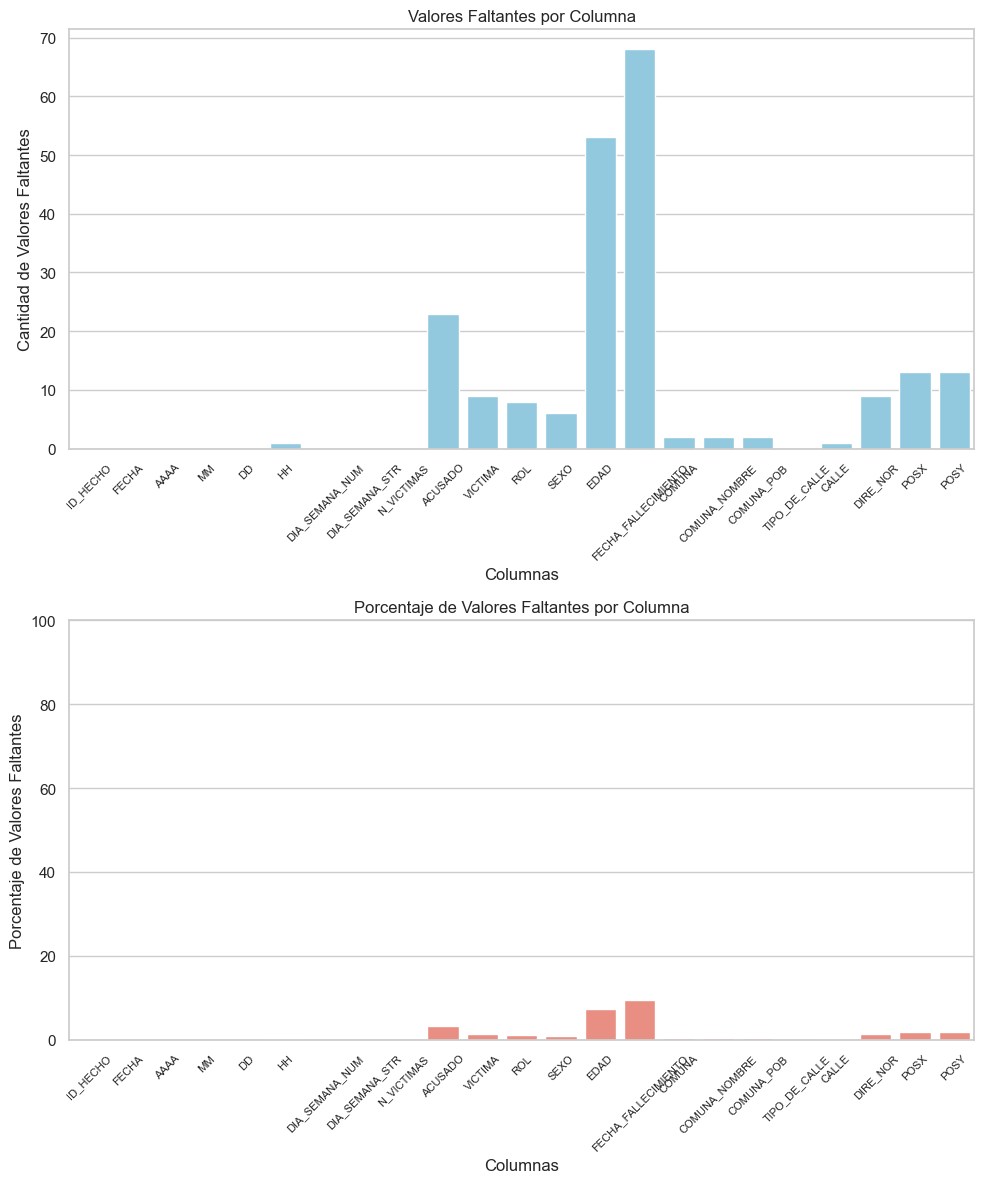

In [99]:
# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico de barras para la cantidad de valores faltantes
sns.barplot(x=valores_faltantes.index, y=valores_faltantes, ax=axs[0], color='skyblue')
axs[0].set_title('Valores Faltantes por Columna')
axs[0].set_xlabel('Columnas')
axs[0].set_ylabel('Cantidad de Valores Faltantes')
axs[0].tick_params(axis='x', rotation=45, labelsize=8)

# Gráfico de barras para el porcentaje de valores faltantes
sns.barplot(x=porcentaje_faltantes.index, y=porcentaje_faltantes, ax=axs[1], color='salmon')
axs[1].set_title('Porcentaje de Valores Faltantes por Columna')
axs[1].set_xlabel('Columnas')
axs[1].set_ylabel('Porcentaje de Valores Faltantes')
axs[1].tick_params(axis='x', rotation=45, labelsize=8)

# Establecer el rango del eje Y del segundo gráfico
axs[1].set_ylim(0, 100)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



# Observaciones y definiciones

Se observa que, si bien más de la mitad de las columnas presentan valores faltantes, en la mayoría de los casos (18 de 21), estos no superan el 2% del total de registros.

Como prioridad, se establece **no eliminar** ningún registro debido a la falta de datos. El indicador más relevante solicitado es la cantidad de víctimas en un período determinado, la cual no se ve afectada por los valores faltantes.

A continuación, se analizarán algunos campos que pueden ser completados utilizando el contexto de los valores que los acompañan en el registro. Esto puede facilitar el análisis estadístico que realizaremos más adelante, asegurando que el relleno no cause desviaciones significativas en el campo analizado.


### Columna 'HH'

Se decide completar el valor faltante por la media de dicha columna, ya que no es valor determinante ni generera cambios de tendencias en los resultados. 

In [100]:
# Calcular la media de la columna 'HH' y redondearla al entero más cercano
media_hh = round(dataset['HH'].mean())

# Completar los valores faltantes en la columna 'HH' con la media redondeada
dataset['HH'].fillna(media_hh, inplace=True)


### Columna 'COMUNA'

Se busca en el registro faltante si se encuentra completo el campo 'CALLE', y en caso de ser afirmativo, se completa con la comuna de más apariciones para dicha dirección. 

In [101]:
# Filtrar las filas donde 'COMUNA' falta y 'DIRE_NOR' está completo
filtro_comuna = dataset['COMUNA'].isnull() & dataset['CALLE'].notnull()
filas_filtro = dataset[filtro_comuna]

filas_filtro

ID_HECHO       FECHA  AAAA  MM  DD   HH  DIA_SEMANA_NUM DIA_SEMANA_STR  \
141  2016-0174  2016-12-27  2016  12  27  0.0               1         Martes   

     N_VICTIMAS ACUSADO  ... EDAD FECHA_FALLECIMIENTO COMUNA  COMUNA_NOMBRE  \
141           1     NaN  ...  NaN                 NaN    NaN            NaN   

    COMUNA_POB  TIPO_DE_CALLE                 CALLE              DIRE_NOR  \
141        NaN      AUTOPISTA  AUTOPISTA 25 DE MAYO  AUTOPISTA 25 DE MAYO   

    POSX POSY  
141  NaN  NaN  

[1 rows x 23 columns]

In [102]:
# Tomar el valor de 'CALLE' del único registro encontrado
calle = filas_filtro.iloc[0]['CALLE']

# Encontrar la COMUNA más repetida para este 'CALLE' en el dataset original
comuna_mas_repetida = dataset[dataset['CALLE'] == calle]['COMUNA'].mode().iloc[0]

# Obtener el 'COMUNA_NOMBRE' correspondiente al valor más repetido de 'COMUNA'
comuna_nombre_mas_repetido = dataset.loc[dataset['COMUNA'] == comuna_mas_repetida, 'COMUNA_NOMBRE'].iloc[0]

# Actualizar los valores faltantes
dataset.loc[filtro_comuna, 'COMUNA'] = comuna_mas_repetida
dataset.loc[filtro_comuna, 'COMUNA_NOMBRE'] = comuna_nombre_mas_repetido

### Columna POSX y POSY

Dado que estos datos sirven para una visulización geográfica de la localización de los eventos, se decide completar los valores faltantes con los valores más recurrentes de acuerdo a la COMUNA y CALLE que se disponen del registro. 

In [103]:
# Filtrar el dataset para obtener solo los registros con valores faltantes en POSX y POSY
filtro_pos_faltante = dataset['POSX'].isnull() | dataset['POSY'].isnull()
registros_faltantes_pos = dataset[filtro_pos_faltante]

# Itero por cada registro con valores faltantes
for indice, registro in registros_faltantes_pos.iterrows():
    
     # Verificar si COMUNA es nulo
    if pd.isnull(registro['COMUNA']):
        # Pasar a la siguiente fila
        continue
    
    # Filtrar el dataset original por COMUNA y CALLE, y POSX no nulo. 
    filtro_comuna_calle = (dataset['COMUNA'] == registro['COMUNA']) & \
                            (dataset['CALLE'] == registro['CALLE']) & \
                            (dataset['POSX'].notnull())
    
    registros_encontrados = dataset[filtro_comuna_calle]
    
    # Si se encontraron registros para la combinación
    if not registros_encontrados.empty:
        # Copiar los datos de POSX y POSY del primer registro encontrado
        posx = registros_encontrados.iloc[0]['POSX']
        posy = registros_encontrados.iloc[0]['POSY']
        # Actualizar los valores nulos de POSX y POSY en el registro actual
        dataset.at[indice, 'POSX'] = posx
        dataset.at[indice, 'POSY'] = posy
    else:
        # Paso 2.2: Obtener el valor de POSX y POSY que más se repite para el valor de COMUNA
        posx_mas_repetido = dataset.loc[dataset['COMUNA'] == registro['COMUNA'], 'POSX'].mode().iloc[0]
        posy_mas_repetido = dataset.loc[dataset['COMUNA'] == registro['COMUNA'], 'POSY'].mode().iloc[0]
        # Actualizar los valores nulos de POSX y POSY en el registro actual
        dataset.at[indice, 'POSX'] = posx_mas_repetido
        dataset.at[indice, 'POSY'] = posy_mas_repetido


## Búsqueda de valores atípicos
---

Se realizan diagramas de boxplot para las variables numéricas

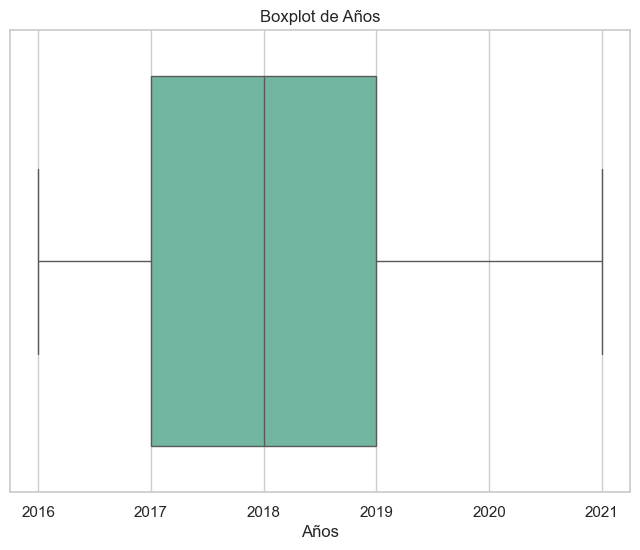

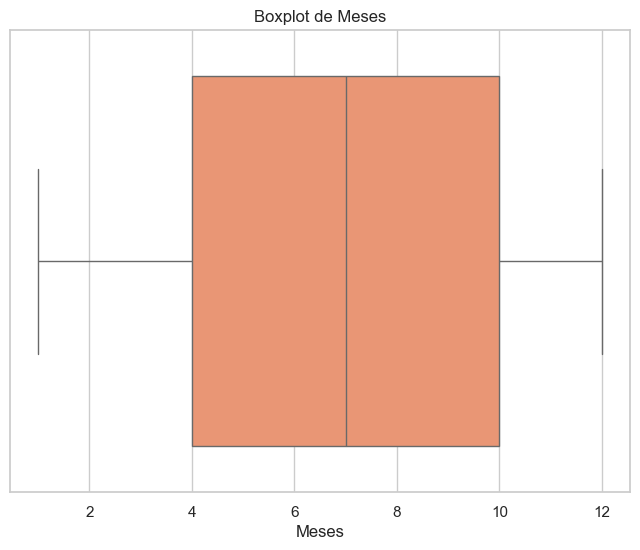

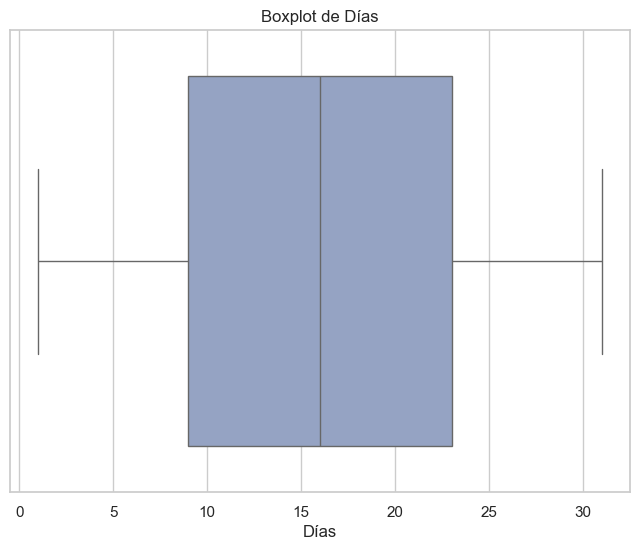

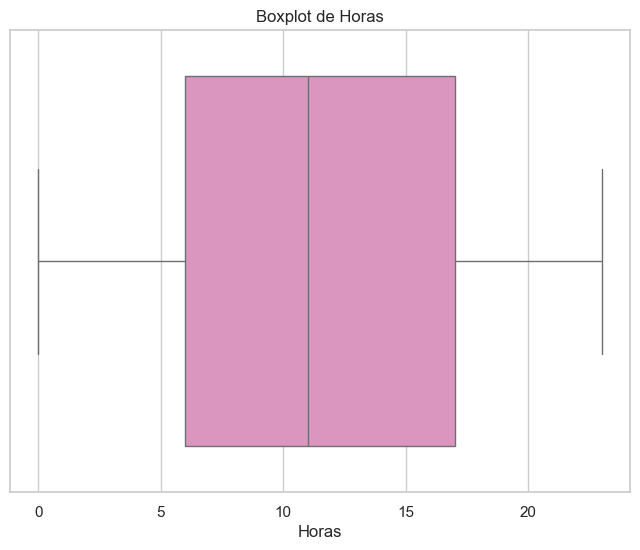

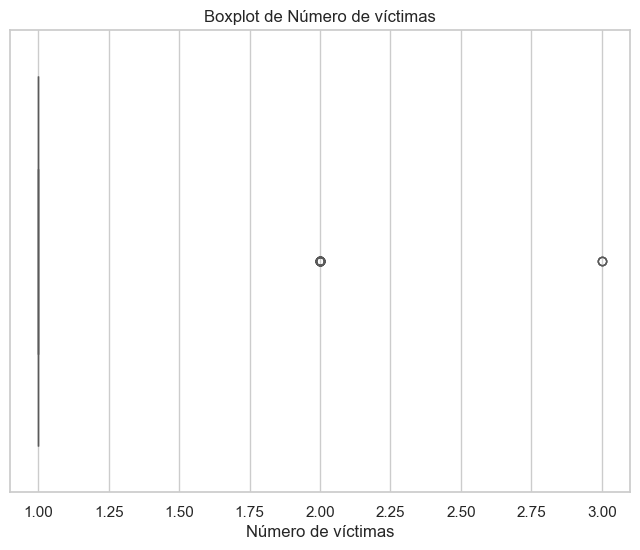

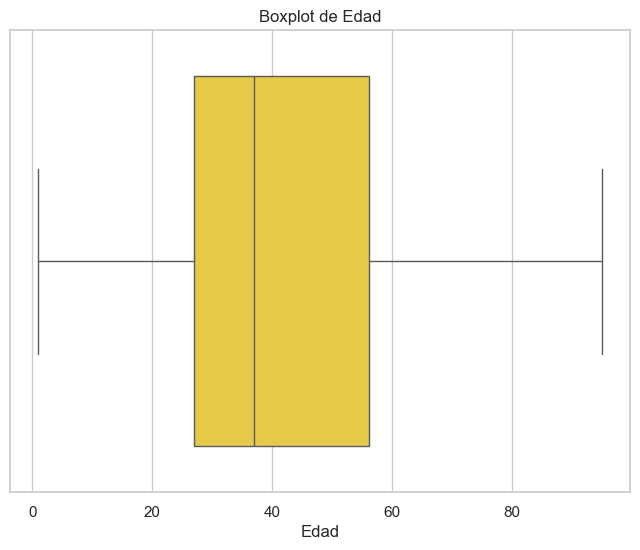

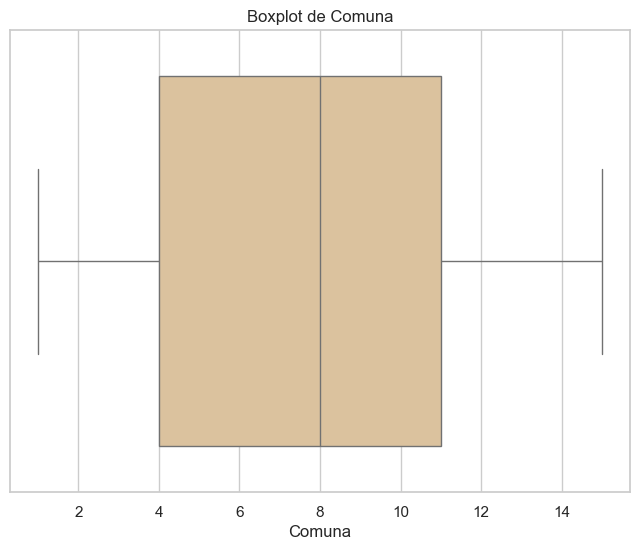

In [104]:
# Definir las leyendas para cada columna
leyendas = {
    'AAAA': 'Años',
    'MM': 'Meses',
    'DD': 'Días',
    'HH': 'Horas',
    'N_VICTIMAS': 'Número de víctimas',
    'EDAD': 'Edad',
    'COMUNA': 'Comuna'
}

# Configurar el estilo y paleta de colores
sns.set_style("whitegrid")
colores = sns.color_palette("Set2", len(leyendas))

# Crear boxplots para cada columna
for i, (columna, leyenda) in enumerate(leyendas.items()):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[columna], color=colores[i])
    plt.title(f'Boxplot de {leyenda}')
    plt.xlabel(leyenda)
    plt.show()



### Revisión de la variables N_VICTIMAS

In [105]:
dataset['N_VICTIMAS'].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

N_VICTIMAS
1    676
2     38
3      3
Name: count, dtype: int64


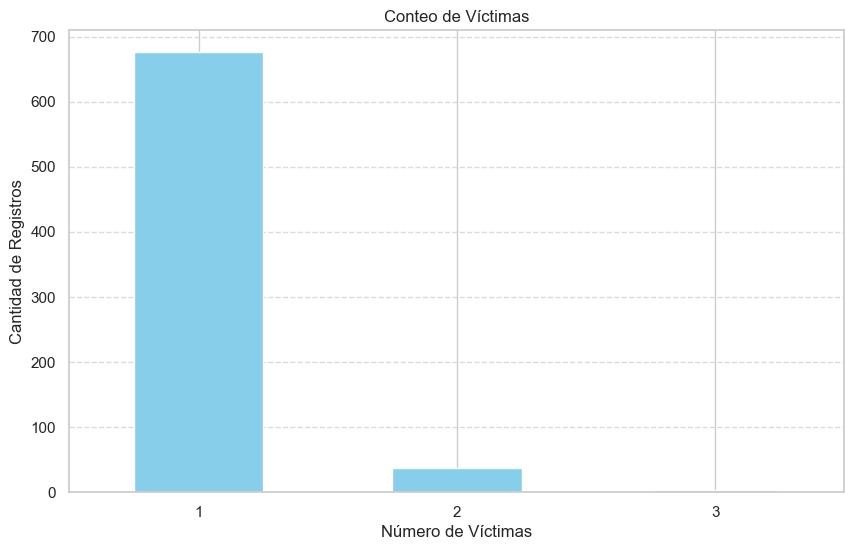

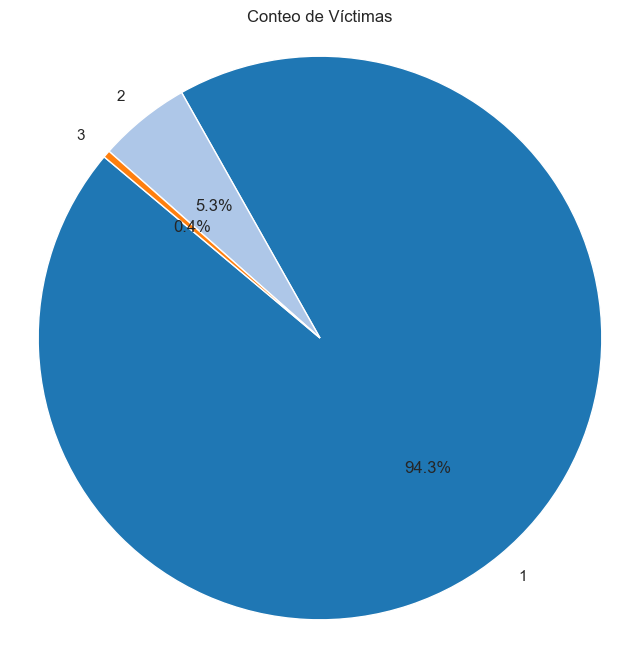

In [106]:
conteo_victimas = dataset['N_VICTIMAS'].value_counts()
print(conteo_victimas)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_victimas.plot(kind='bar', color='skyblue')
plt.title('Conteo de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteo_victimas, labels=conteo_victimas.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Conteo de Víctimas')
plt.axis('equal')  
plt.show()

# Observaciones y definiciones

El análisis sobre las variables numéricas determina que **no se encuentran valores atípicos** en la distribucion de las columnas estudiadas. 
Los valores máximos para cada una de las variables son razonables de acuerdo a la definición de la misma: 
* AAAA (año) entre [2016:2021] 
* MM (meses) entre [1:12]
* DD (días) entre [1:31]
* HH (horas) entre [0:24]
* COMUNA entre [1:14]
* EDAD de las victimas, entre [1:95]

Para el caso particular de *N_VICTIMAS* (número de victimas por evento), el boxplot arroja una concentración en el valor '1' , y se observan valores fuera de rango de '2' y '3'. 

Se analizó la composición de la columna, inidicando que el **94.3%** de los casos las victimas son '1' , un **5.3%** de '2' y apenas un **0.4%** de '3'. Se determina que los resultados del boxplot son razonables de acuerdo al número de victimas que se puede dar en un accidente.   


# Estudio de correlación
_ _ _

Dada la composición del dataset, donde predominan variables temporales como años, meses, días y horas, junto con atributos categóricos como la comuna, es improbable obtener resultados significativos al calcular la correlación entre estas variables numéricas (ya que la correlación verifica la **relación lineal** entre las variables).

 Por tanto, aunque es posible realizar el cálculo de correlación, es importante tener en cuenta que los resultados podrían carecer de relevancia o ser poco significativos debido a la complejidad y variedad de las variables presentes en el dataset. 


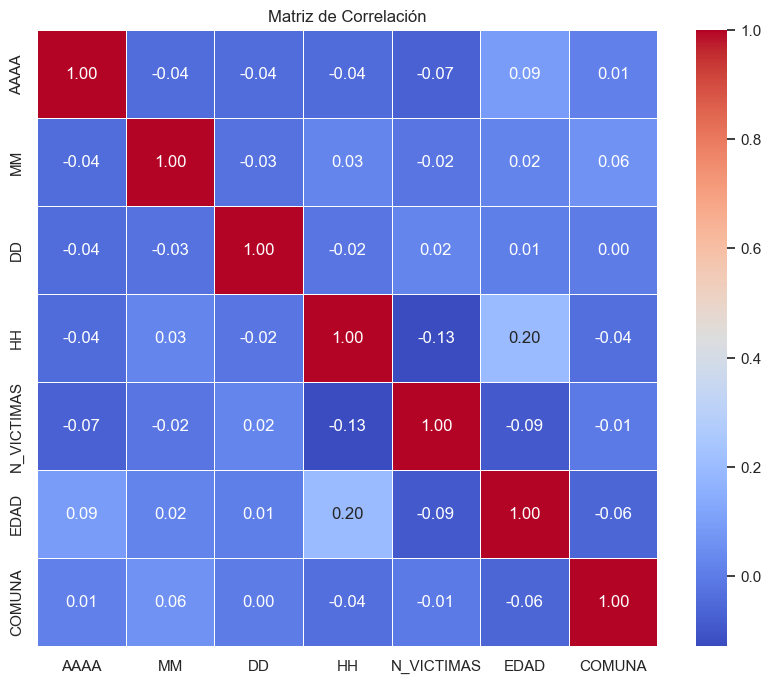

In [107]:
# Seleccionar las columnas de interés
columnas = ['AAAA', 'MM', 'DD', 'HH', 'N_VICTIMAS', 'EDAD', 'COMUNA']
subset = dataset[columnas]

# Calcular la matriz de correlación
correlacion = subset.corr()

# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


Como era de esperarse, los resultados muestran valores bajos de correlación entre las variables estudiadas. 

## Aclaración importante 

A partir de este punto, se lleva a cabo un análisis exhaustivo de los datos con el objetivo de obtener *insights* sobre la frecuencia de accidentes y/o víctimas en relación con otras variables. Por lo tanto, se presta especial atención para evitar **duplicar** información, dado que el conjunto de datos base es el resultado de la fusión de dos dataframes en una etapa previa al análisis exploratorio de datos (EDA).

Las variables heredadas del documento original, que se encuentran en la pestaña 'VICTIMAS', se contabilizarán por cada registro, mientras que las variables heredadas de la pestaña 'HECHOS' se contabilizarán por cada ID de hecho único.

En algunos casos, se crearán subconjuntos de datos con filtros o modificaciones específicas para realizar cálculos estadísticos con mayor facilidad.

Columnas heredadas de la pestaña 'VICTIMAS':

* ROL
* SEXO
* EDAD
* FECHA_FALLECIMIENTO

## Análisis de victimas en variables temporales
---
A continuación se realiza el estudio para ver **la frecuencia** del número de victimas según agrupadas según las diferentes variables temporales, buscando determinar si existe resultados que sean relevantes para exponer. 

### Búsqueda de estacionalidad

Variables
* Año
* Meses
* Días 
* Días de la semana
* Horario del día

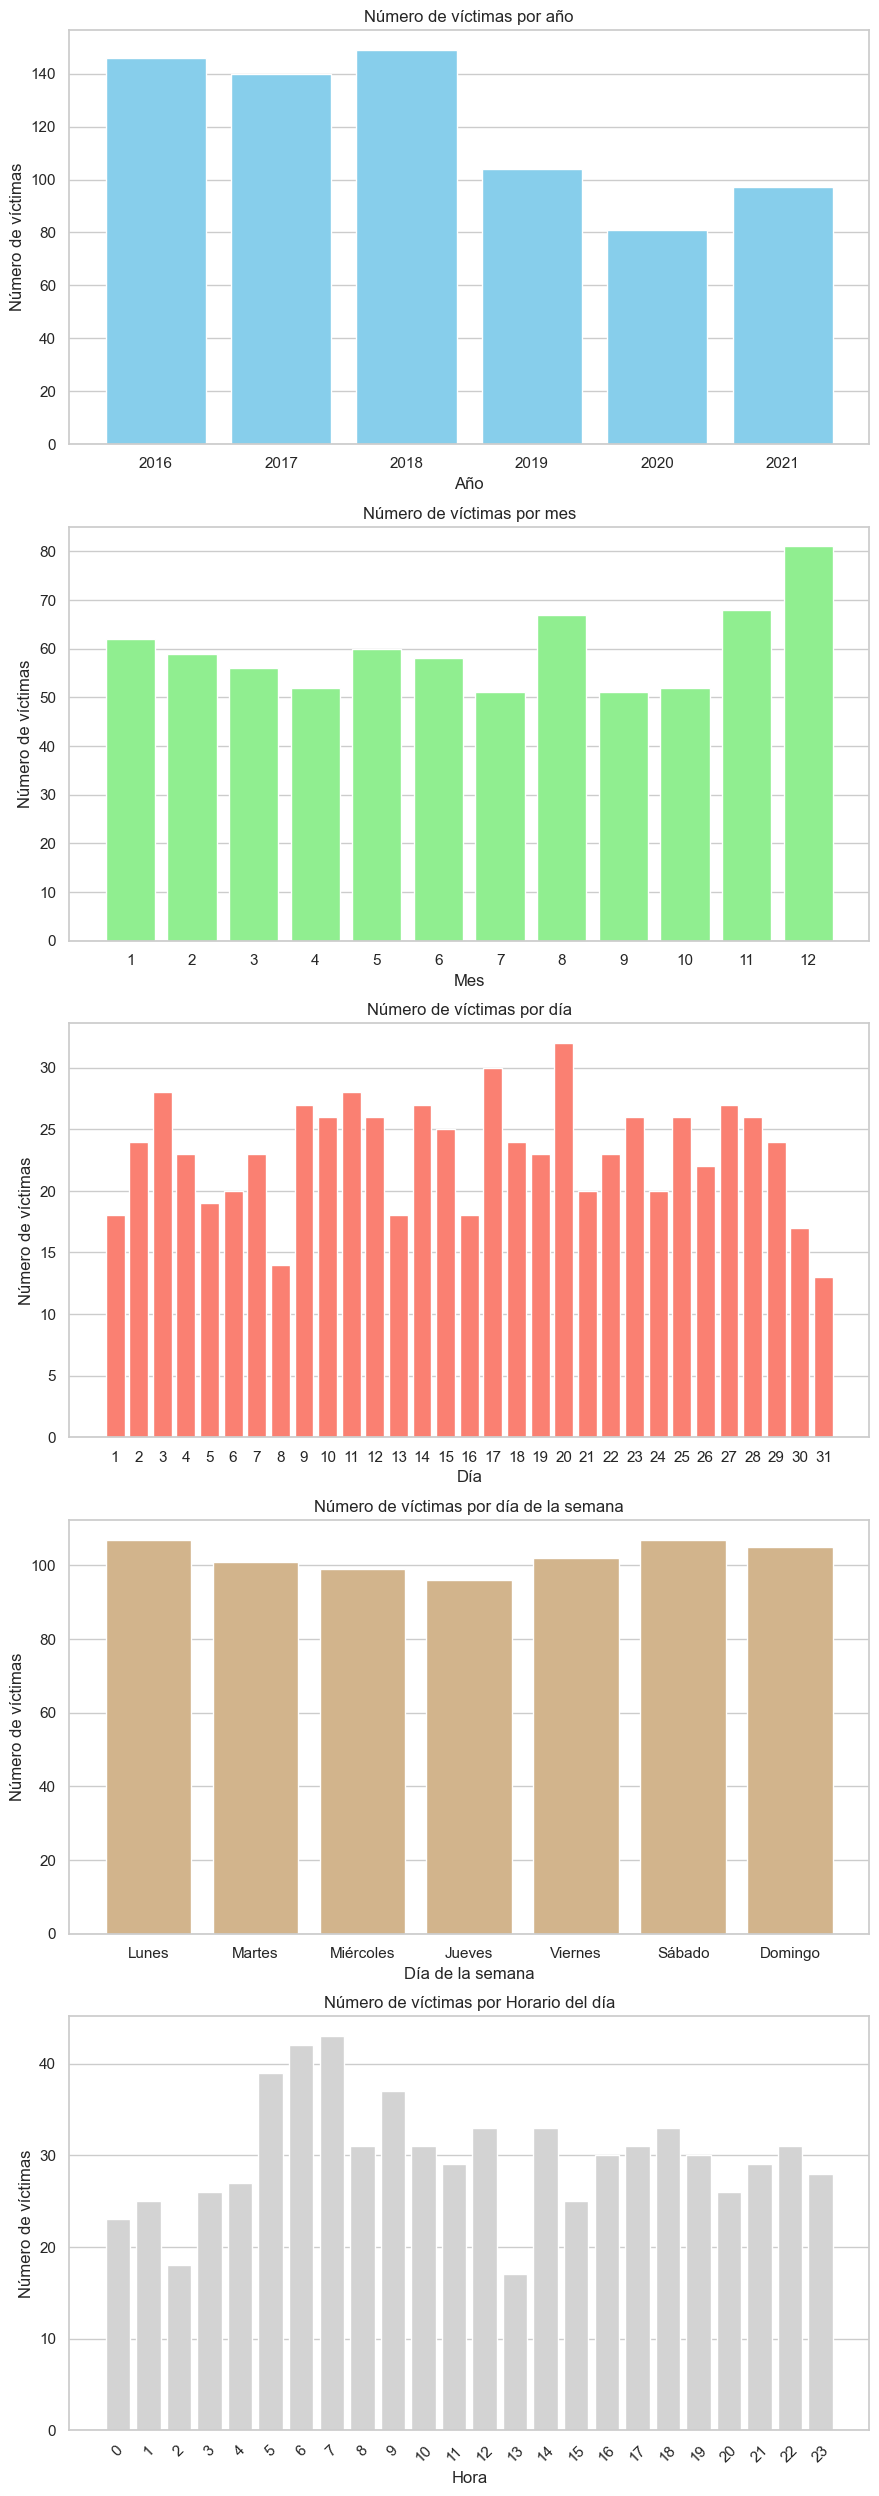

In [108]:
# Agrupar el DataFrame por ID_HECHO y mantener solo una fila por cada ID_HECHO
dataset_1 = dataset.groupby('ID_HECHO').first().reset_index()

# Agrupar por AAAA, MM, y DD y sumar las N_VICTIMAS
datos_agrupados_A = dataset_1.groupby(['AAAA']).agg({'N_VICTIMAS': 'sum'}).reset_index()
datos_agrupados_M = dataset_1.groupby(['MM']).agg({'N_VICTIMAS': 'sum'}).reset_index()
datos_agrupados_D = dataset_1.groupby(['DD']).agg({'N_VICTIMAS': 'sum'}).reset_index()
datos_agrupados_DS = dataset_1.groupby(['DIA_SEMANA_NUM']).agg({'DIA_SEMANA_STR': 'first', 'N_VICTIMAS': 'sum'}).reset_index()
datos_agrupados_H = dataset_1.groupby(['HH']).agg({'N_VICTIMAS': 'sum'}).reset_index()

# Graficar las relaciones
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Graficar la relación entre AAAA y N_VICTIMAS
axs[0].bar(datos_agrupados_A['AAAA'], datos_agrupados_A['N_VICTIMAS'], color='skyblue')
axs[0].set_title('Número de víctimas por año')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de víctimas')
axs[0].grid(axis='x')
axs[0].set_xticks(datos_agrupados_A['AAAA'])  # Establecer las marcas del eje x

# Graficar la relación entre MM y N_VICTIMAS como gráfico de barras
axs[1].bar(datos_agrupados_M['MM'], datos_agrupados_M['N_VICTIMAS'], color='lightgreen')
axs[1].set_title('Número de víctimas por mes')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Número de víctimas')
axs[1].grid(axis='x')
axs[1].set_xticks(datos_agrupados_M['MM'])  # Establecer las marcas del eje x

# Graficar la relación entre DD y N_VICTIMAS como gráfico de barras
axs[2].bar(datos_agrupados_D['DD'], datos_agrupados_D['N_VICTIMAS'], color='salmon')
axs[2].set_title('Número de víctimas por día')
axs[2].set_xlabel('Día')
axs[2].set_ylabel('Número de víctimas')
axs[2].grid(axis='x')
axs[2].set_xticks(datos_agrupados_D['DD'])  # Establecer las marcas del eje x

# Graficar la relación entre DIA_SEMANA y N_VICTIMAS como gráfico de barras
axs[3].bar(datos_agrupados_DS['DIA_SEMANA_STR'], datos_agrupados_DS['N_VICTIMAS'], color='#D2B48C')
axs[3].set_title('Número de víctimas por día de la semana')
axs[3].set_xlabel('Día de la semana')
axs[3].set_ylabel('Número de víctimas')
axs[3].grid(axis='x')
axs[3].set_xticks(datos_agrupados_DS['DIA_SEMANA_STR'])  # Establecer las marcas del eje x

# Graficar la relación entre HH y N_VICTIMAS como gráfico de barras
axs[4].bar(datos_agrupados_H['HH'], datos_agrupados_H['N_VICTIMAS'], color='#D3D3D3')
axs[4].set_title('Número de víctimas por Horario del día')
axs[4].set_xlabel('Hora')
axs[4].set_ylabel('Número de víctimas')
axs[4].grid(axis='x')
axs[4].set_xticks(datos_agrupados_H['HH'])  # Establecer las marcas del eje x

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Ajustar márgenes
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejorar la legibilidad
plt.show()





## Varación porcentual de los campos MES, DIA y HORA, en relación a la media

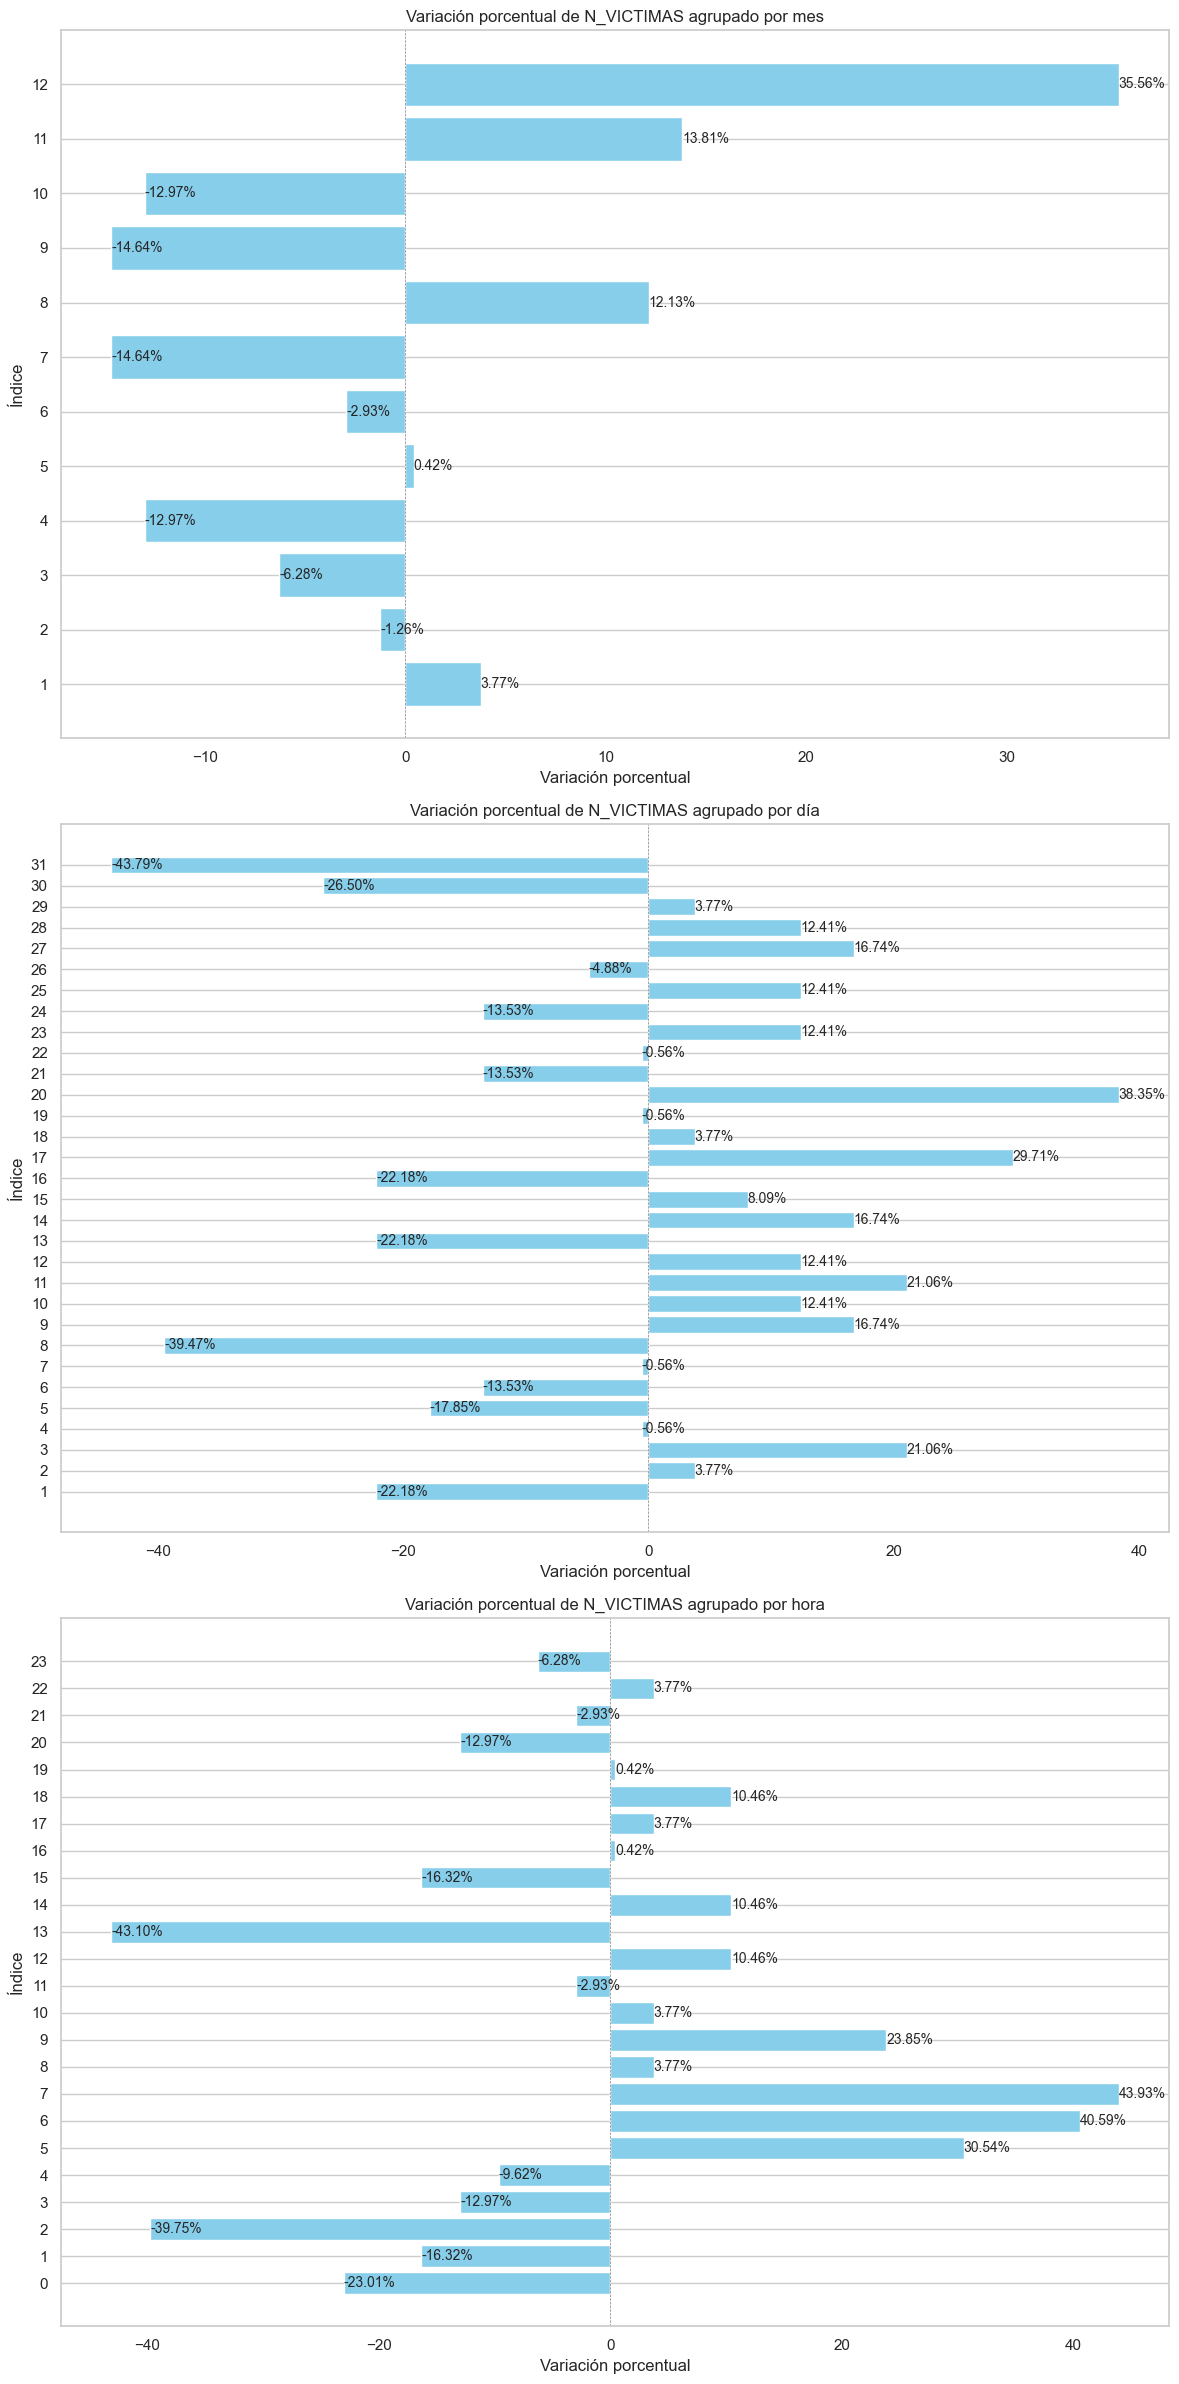

In [109]:
# Calcular la variación porcentual para cada DataFrame
datos_agrupados_M['Variacion_porcentual'] = ((datos_agrupados_M['N_VICTIMAS'] - datos_agrupados_M['N_VICTIMAS'].mean()) / datos_agrupados_M['N_VICTIMAS'].mean()) * 100
datos_agrupados_D['Variacion_porcentual'] = ((datos_agrupados_D['N_VICTIMAS'] - datos_agrupados_D['N_VICTIMAS'].mean()) / datos_agrupados_D['N_VICTIMAS'].mean()) * 100
datos_agrupados_H['Variacion_porcentual'] = ((datos_agrupados_H['N_VICTIMAS'] - datos_agrupados_H['N_VICTIMAS'].mean()) / datos_agrupados_H['N_VICTIMAS'].mean()) * 100

# Ordenar los DataFrames por la variación porcentual en orden descendente
datos_agrupados_M_sorted = datos_agrupados_M.sort_values(by='Variacion_porcentual', ascending=False)
datos_agrupados_D_sorted = datos_agrupados_D.sort_values(by='Variacion_porcentual', ascending=False)
datos_agrupados_H_sorted = datos_agrupados_H.sort_values(by='Variacion_porcentual', ascending=False)

# Configurar el tamaño de los subplots
plt.figure(figsize=(12, 24))

# Subplot para datos_agrupados_M
plt.subplot(3, 1, 1)
bars_M = plt.barh(datos_agrupados_M_sorted.index + 1.5, datos_agrupados_M_sorted['Variacion_porcentual'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Variación porcentual de N_VICTIMAS agrupado por mes')
plt.xlabel('Variación porcentual')
plt.ylabel('Índice')
plt.grid(axis='x')
plt.yticks(datos_agrupados_M_sorted.index + 1.5, datos_agrupados_M_sorted.index + 1)  # Sumar 1 al índice

# Agregar etiquetas de valor a la derecha de cada barra con un tamaño más pequeño
for bar in bars_M:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f"{xval:.2f}%", va='center', fontsize=10)

# Subplot para datos_agrupados_D
plt.subplot(3, 1, 2)
bars_D = plt.barh(datos_agrupados_D_sorted.index + 1.5, datos_agrupados_D_sorted['Variacion_porcentual'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Variación porcentual de N_VICTIMAS agrupado por día')
plt.xlabel('Variación porcentual')
plt.ylabel('Índice')
plt.grid(axis='x')
plt.yticks(datos_agrupados_D_sorted.index + 1.5, datos_agrupados_D_sorted.index + 1)  # Sumar 1 al índice

# Agregar etiquetas de valor a la derecha de cada barra con un tamaño más pequeño
for bar in bars_D:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f"{xval:.2f}%", va='center', fontsize=10)

# Subplot para datos_agrupados_H
plt.subplot(3, 1, 3)
bars_H = plt.barh(datos_agrupados_H_sorted.index, datos_agrupados_H_sorted['Variacion_porcentual'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Variación porcentual de N_VICTIMAS agrupado por hora')
plt.xlabel('Variación porcentual')
plt.ylabel('Índice')
plt.grid(axis='x')
plt.yticks(datos_agrupados_H_sorted.index, datos_agrupados_H_sorted.index)  # Mantener el índice original

# Agregar etiquetas de valor a la derecha de cada barra con un tamaño más pequeño
for bar in bars_H:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f"{xval:.2f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()




Agrupo los horarios según su secuencia y resultado, para establecer cuatro grupos de franjas horarias: 
* Mañana: 05:00 - 10:00
* Mediodía: 11:00 - 16:00
* Tarde: 17:00 - 22:00
* Noche: 23:00 - 04:00 

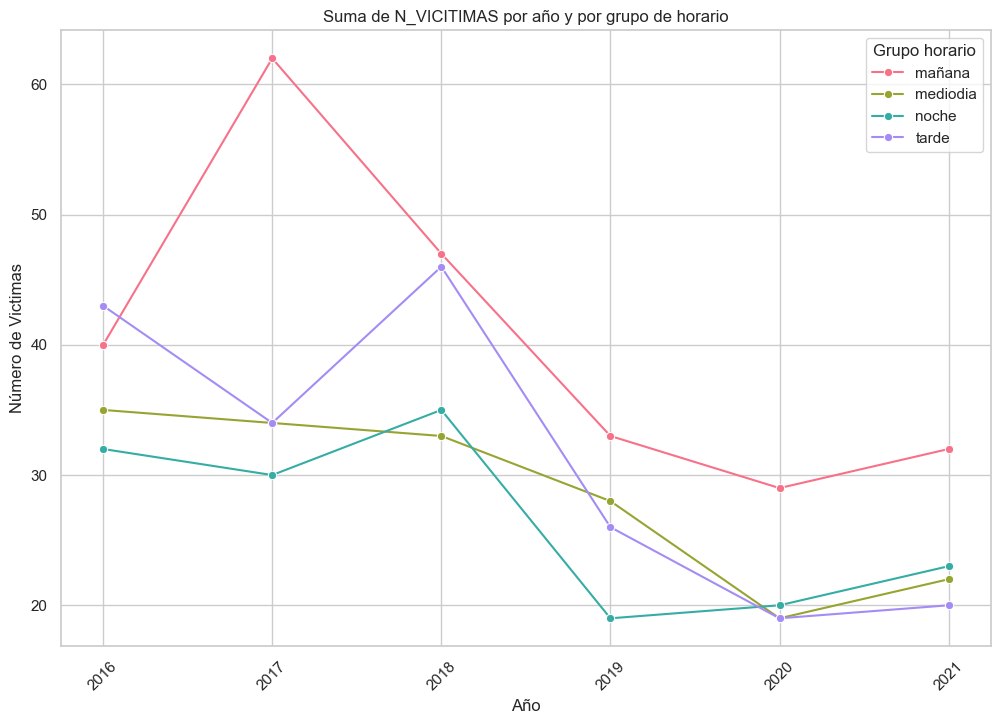

In [154]:
# Segmentar los datos de la columna HH en los grupos especificados
def segmentar_horario(hora):
    if 5 <= hora <= 10:
        return 'mañana'
    elif 11 <= hora <= 16:
        return 'mediodia'
    elif 17 <= hora <= 22:
        return 'tarde'
    else:
        return 'noche'

# Aplicar la función para crear la nueva columna
dataset['GRUPO_HORARIO'] = dataset['HH'].apply(segmentar_horario)

# Agrupar los datos por año y por los nuevos grupos de horarios, y sumar las N_VICITIMAS en cada grupo
datos_agrupados = dataset.groupby(['AAAA', 'GRUPO_HORARIO'])['N_VICTIMAS'].sum().reset_index()

# Paso 3: Crear un gráfico de líneas para visualizar la suma de N_VICITIMAS por año y por cada grupo de horarios
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_agrupados, x='AAAA', y='N_VICTIMAS', hue='GRUPO_HORARIO', marker='o', palette='husl')
plt.title('Suma de N_VICITIMAS por año y por grupo de horario')
plt.xlabel('Año')
plt.ylabel('Número de Victimas')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Grupo horario')
plt.show()


## Mapa de calor por Hora del día y días de la semana

Se analiza el segmente de número de victima por día de la semana y por hora, para verificar si existe alguna tendencia sobre estos. 

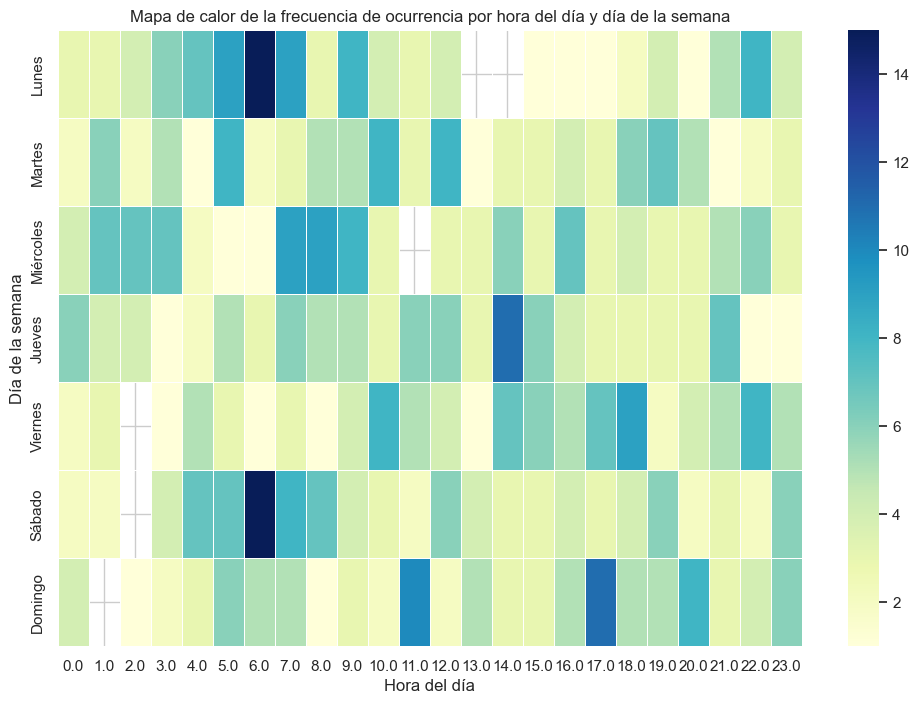

In [111]:
# Ordenar el DataFrame por la columna 'DIA_SEMANA_NUM'
dataset_ord = dataset.sort_values(by='DIA_SEMANA_NUM')

# crear una tabla pivotante - Horas vs Día de la semana
pivot_table = dataset_ord.pivot_table(index='DIA_SEMANA_STR', columns='HH', aggfunc='size')

# Obtener el orden de los nombres de los días de la semana
orden_dias_semana = dataset.sort_values('DIA_SEMANA_NUM')['DIA_SEMANA_STR'].unique()

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, linecolor='white', yticklabels=orden_dias_semana)
plt.title('Mapa de calor de la frecuencia de ocurrencia por hora del día y día de la semana')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.show()

## Observaciones

### Años

Se observa una notable disminución en el número de víctimas para el año 2019 en comparación con los años anteriores. Esto puede atribuirse a las políticas adoptadas por la Ciudad, como el 'Plan de Seguridad Vial de la Ciudad 2016-2019', que tenía como objetivo reducir los accidentes en un 30% para el año 2019.

Fuente: [Plan de Seguridad Vial de la Ciudad](https://buenosaires.gob.ar/movilidad/plan-de-seguridad-vial/plan-de-seguridad-vial-de-la-ciudad)

En el año 2020, también se observa una disminución respecto al año anterior, posiblemente influenciada por el inicio de la pandemia.

Para el año 2021, se registra un aumento en el número de eventos, aunque la cifra final sigue estando por debajo de la obtenida en el año 2019.

### Meses

El mes 12 es el que presenta el mayor número de víctimas, con un **35.56%** por encima de la media. No se observa una disminución significativa de accidentes en los meses de verano, cuando la mayoría de las personas están de vacaciones y hay menos tráfico en la ciudad. En enero, el número de accidentes está por encima de la media, mientras que en febrero y marzo, se registra un ligero descenso por debajo de la media, siendo del -1.26% y -6.28%, respectivamente.

### Días

Respecto a los días de la semana, se observa una distribución uniforme, lo que descarta la hipótesis de un aumento o disminución de los eventos los fines de semana.

### Horarios

Se observa que entre las 00:00 y las 04:00 horas, todos los intervalos presentan valores por debajo de la media. Por el contrario, a partir de las 05:00 hasta las 10:00 horas, todos los intervalos muestran un número de eventos por encima de la media. Esto podría estar relacionado con los horarios diurnos en los que la mayoría de la población se desplaza hacia el trabajo.

Como particularidad, se observa una disminución de eventos en el horario de las 13:00 horas, posiblemente debido a que es un típico horario de almuerzo.

Al agrupar por franja horia, se aprecia que la mayor cantidad de accidentes se da en el período de 'Mañana' para todos los años estudiados. 

## Análisis temporal en semestres

In [112]:
# Combinar las variables AAAA y MM en una nueva columna
dataset_1['AAAA_MM'] = dataset_1['AAAA'].astype(str) + '-' + dataset_1['MM'].astype(str)

# Filtrar el DataFrame por año
datos_por_año = dataset_1.groupby('AAAA').agg({'N_VICTIMAS': 'sum'}).reset_index()

# Agrupar por año y mes combinados y sumar las N_VICTIMAS
datos_agrupados_AAAA_MM = dataset_1.groupby(['AAAA_MM']).agg({'N_VICTIMAS': 'sum'}).reset_index()

# Extraer los años de la columna 'AAAA_MM'
años = [int(a.split('-')[0]) for a in datos_agrupados_AAAA_MM['AAAA_MM']]

# Dividir cada año en dos grupos: primer semestre (MM 1-6) y segundo semestre (MM 7-12)
primer_semestre = datos_por_año.apply(lambda row: dataset_1[(dataset_1['AAAA'] == row['AAAA']) & (dataset_1['MM'] <= 6)]['N_VICTIMAS'].sum(), axis=1)
segundo_semestre = datos_por_año.apply(lambda row: dataset_1[(dataset_1['AAAA'] == row['AAAA']) & (dataset_1['MM'] > 6)]['N_VICTIMAS'].sum(), axis=1)

# Crear un DataFrame con los resultados
datos_semestrales = pd.DataFrame({'AAAA': datos_por_año['AAAA'], 'Primer Semestre': primer_semestre, 'Segundo Semestre': segundo_semestre})

# Crear un diccionario para almacenar los resultados
resultados = {}

# Iterar sobre cada año único en el DataFrame
for año in dataset_1['AAAA'].unique():
    # Calcular el total de víctimas en el primer semestre (MM <= 6) y segundo semestre (MM > 6) del año actual
    primer_semestre = dataset_1[(dataset_1['AAAA'] == año) & (dataset_1['MM'] <= 6)]['N_VICTIMAS'].sum()
    segundo_semestre = dataset_1[(dataset_1['AAAA'] == año) & (dataset_1['MM'] > 6)]['N_VICTIMAS'].sum()
    
    # Almacenar los resultados en el diccionario
    resultados[f'{año}_1'] = primer_semestre
    resultados[f'{año}_2'] = segundo_semestre

# Crear un DataFrame a partir del diccionario
datos_semestrales_2 = pd.DataFrame(list(resultados.items()), columns=['AAAA_MM', 'Número de víctimas'])

# Calcular el semestre a partir de la columna 'AAAA_MM'
datos_semestrales_2['Semestre'] = datos_semestrales_2['AAAA_MM'].str.split('_').str[1]

# Ordenar los datos de manera cronológica
datos_semestrales_2 = datos_semestrales_2.sort_values(by=['AAAA_MM'])

# Calcular las diferencias porcentuales con el registro anterior
diferencias_porcentuales = datos_semestrales_2['Número de víctimas'].pct_change() * 100

# Reemplazar el valor NaN en la primera fila por 0
diferencias_porcentuales.iloc[0] = 0

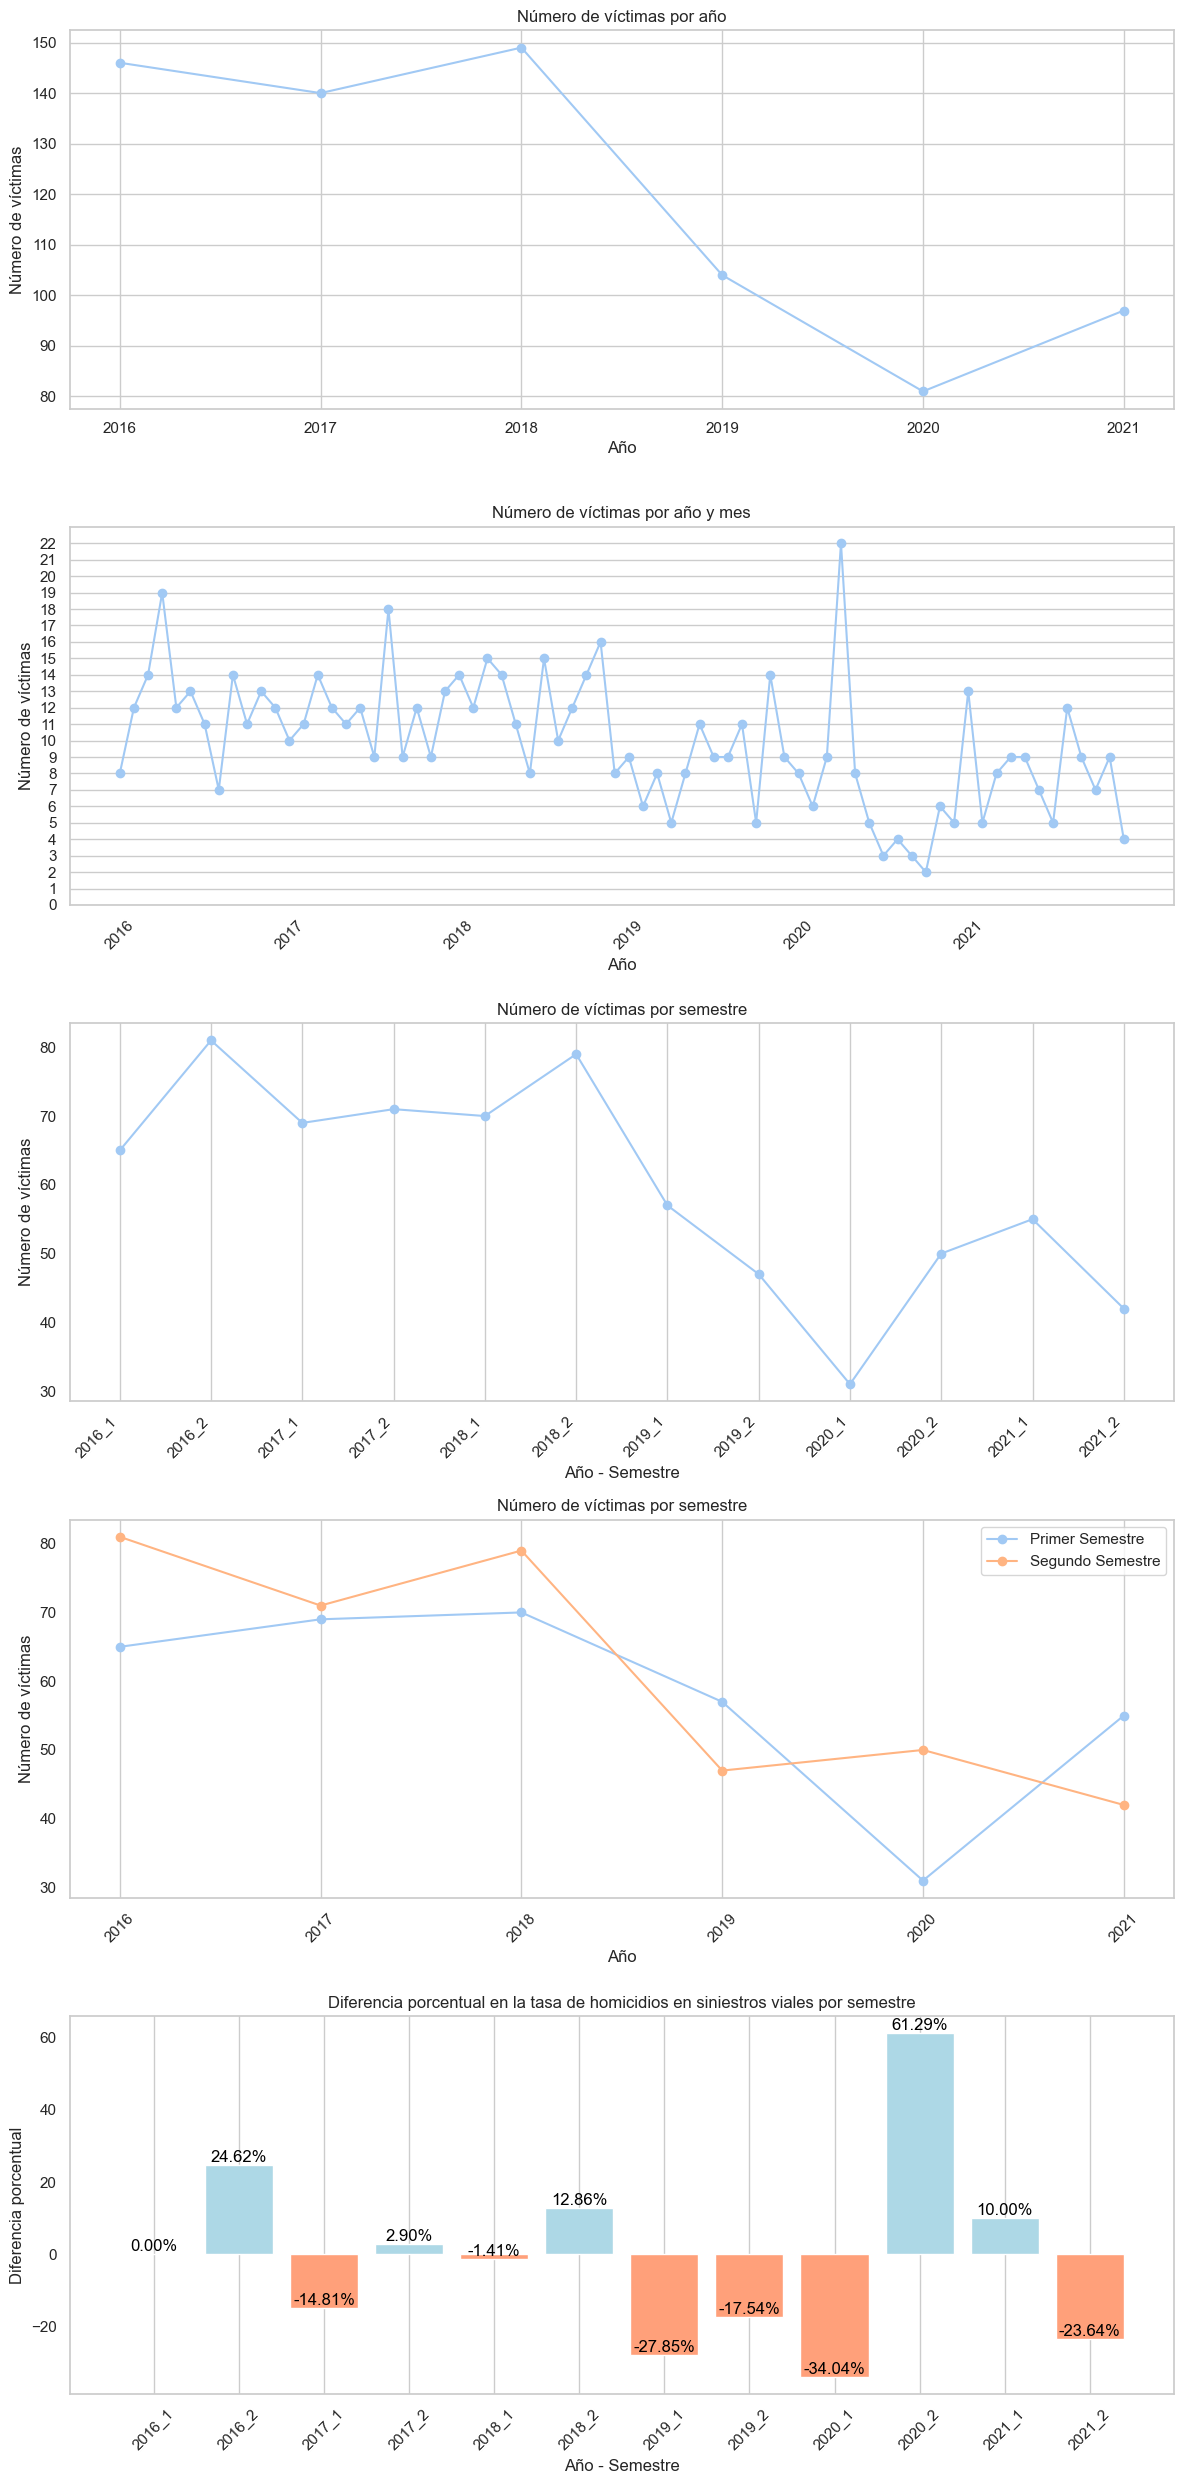

In [113]:
plt.figure(figsize=(12, 25))

# Subplot 1: Número de víctimas por año
plt.subplot(5, 1, 1)
plt.plot(datos_agrupados_A['AAAA'], datos_agrupados_A['N_VICTIMAS'], marker='o', linestyle='-')
plt.title('Número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')

# Subplot 2: Número de víctimas por año y mes
plt.subplot(5, 1, 2)
plt.plot(datos_agrupados_AAAA_MM['AAAA_MM'], datos_agrupados_AAAA_MM['N_VICTIMAS'], marker='o', linestyle='-')
plt.title('Número de víctimas por año y mes')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.xticks(datos_agrupados_AAAA_MM['AAAA_MM'][::12], años[::12], rotation=45)  # Mostrar solo los años en el eje x
plt.yticks(range(0, int(datos_agrupados_AAAA_MM['N_VICTIMAS'].max()) + 1))  # Mostrar valores enteros en el eje y
plt.grid(axis='x')  # Mostrar solo la grilla horizontal

# Subplot 3: Número de víctimas por semestre
plt.subplot(5, 1, 3)
plt.plot(datos_semestrales_2['AAAA_MM'], datos_semestrales_2['Número de víctimas'], marker='o', linestyle='-')
plt.title('Número de víctimas por semestre')
plt.xlabel('Año - Semestre')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Subplot 4: Número de víctimas por semestre (comparación primer y segundo semestre)
plt.subplot(5, 1, 4)
plt.plot(datos_semestrales['AAAA'], datos_semestrales['Primer Semestre'], marker='o', linestyle='-', label='Primer Semestre')
plt.plot(datos_semestrales['AAAA'], datos_semestrales['Segundo Semestre'], marker='o', linestyle='-', label='Segundo Semestre')
plt.title('Número de víctimas por semestre')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Subplot 5: Diferencia porcentual en la tasa de homicidios en siniestros viales por semestre
plt.subplot(5, 1, 5)
# Iterar sobre las barras
for i, valor in enumerate(diferencias_porcentuales):
    # Definir el color de la barra
    color = '#ADD8E6' if valor >= 0 else '#FFA07A'

    # Dibujar la barra y el texto
    plt.bar(datos_semestrales_2['AAAA_MM'][i], valor, color=color)
    plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom', color='black')
plt.title('Diferencia porcentual en la tasa de homicidios en siniestros viales por semestre')
plt.xlabel('Año - Semestre')
plt.ylabel('Diferencia porcentual')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Se observa una disminución considerable en el número de víctimas durante el año 2019 en comparación con los periodos anteriores. Del mismo modo, se registra una disminución significativa durante el primer semestre de 2020, lo que se presume que se debe a la pandemia, ya que coincide con su inicio y las restricciones de circulación impuestas en ese momento.

Asimismo, al comparar de manera intersemestral, se observa que la suma del segundo semestre 2020_2 y el primer semestre 2021 acumulan un aumento del 77% (61.29% + 10%) en relación al periodo de 2020.

Además, el número de víctimas en el primer semestre de 2020 supera al del segundo semestre de 2019, mientras que la reducción en el último semestre de 2021 muestra una disminución significativa no solo respecto al semestre anterior, sino también en comparación con todos los registros, siendo solo superada por el valor del primer semestre de 2020, que se supone fue el más restrictivo y coincidente con el inicio de la pandemia.

Obviando la particularidad del año 2020, se observa que en los segundos semestres hasta el año 2018 se concentraban aumentos de eventos, y que para el año 2019 y 2021, ambos segundos semestre registran dimuniciones en relación a su antecesor. 

## KPI 1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

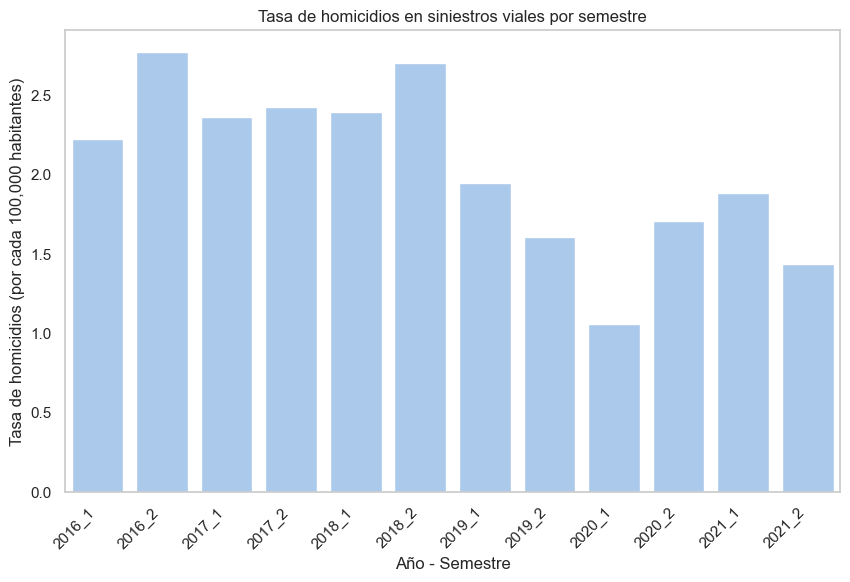

In [114]:
# Calcular la población total
poblacion_total = dataset_1['COMUNA_POB'].drop_duplicates().sum()

# Calcular la tasa de homicidios en siniestros viales por semestre
datos_semestrales_2['Tasa_homicidios'] = (datos_semestrales_2['Número de víctimas'] / poblacion_total) * 100000

# Graficar la tasa de homicidios en siniestros viales por semestre
plt.figure(figsize=(10, 6))
sns.barplot(data=datos_semestrales_2, x='AAAA_MM', y='Tasa_homicidios', dodge=False, legend=False)
plt.title('Tasa de homicidios en siniestros viales por semestre')
plt.xlabel('Año - Semestre')
plt.ylabel('Tasa de homicidios (por cada 100,000 habitantes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

posx and posy should be finite values
posx and posy should be finite values


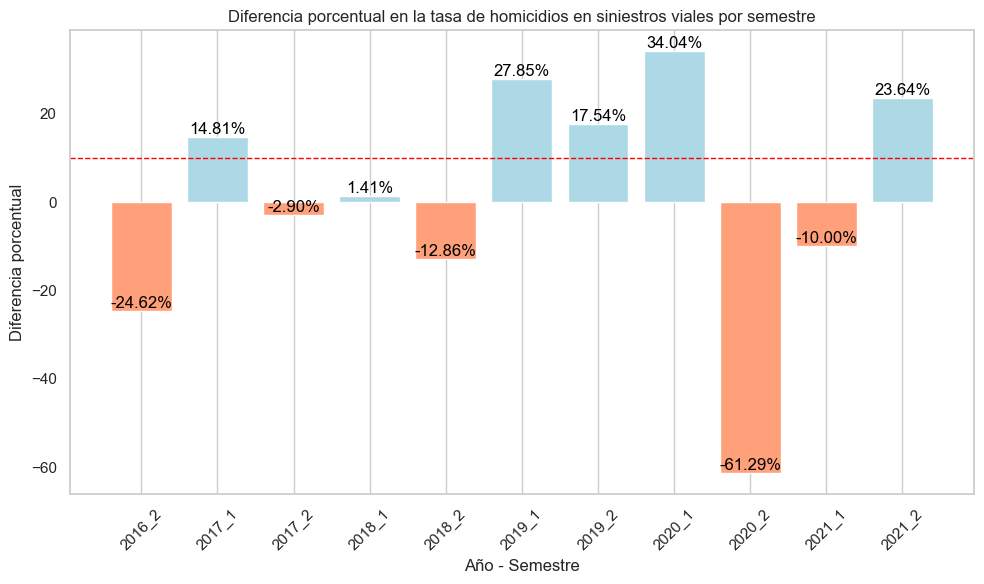

In [147]:
# Calcular la diferencia porcentual en la tasa de homicidios en siniestros viales por semestre
diferencias_porcentuales = datos_semestrales_2['Tasa_homicidios'].pct_change() * -100

# Diferencia porcentual en la tasa de homicidios en siniestros viales por semestre
plt.figure(figsize=(10, 6))
# Iterar sobre las barras
for i, valor in enumerate(diferencias_porcentuales):
    # Definir el color de la barra
    color = '#ADD8E6' if valor >= 0 else '#FFA07A'

    # Dibujar la barra y el texto
    plt.bar(datos_semestrales_2['AAAA_MM'][i], valor, color=color)
    plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom', color='black')
plt.title('Diferencia porcentual en la tasa de homicidios en siniestros viales por semestre')
plt.xlabel('Año - Semestre')
plt.ylabel('Diferencia porcentual')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Agregar la línea horizontal en y=10
plt.axhline(y=10, color='red', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La medición de la tasa de homocidios mantiene la misma relación porcentual entre semestres que las ya calculadas anteriomente con número de vicitmas. 

Se altera el signo del resultado para valorar positivamente el cumplimiento de la reducción de la tasa, y se establece la línea de tendencia en 10% para visualizar los semestres que obtienen aceptación del KPI. 

Como se observa, a partir del 2019 en adelante existe una tendencia hacia el cumplimiento de la meta, sólo obstaculizada por los periodos de pandemia que no dejan establecer conclusiones claras repecto a la efectividad de acciones que se estuvieran tomando antes y después de la misma. Resaltando que en el año 2021 se vuelve a la senda del cumplimiento de la meta. 

## Análisis de vicitmas por locación
___

Se estudia la cantidad de eventos en relación a la ubicación del accidente, y las características de su locación. 

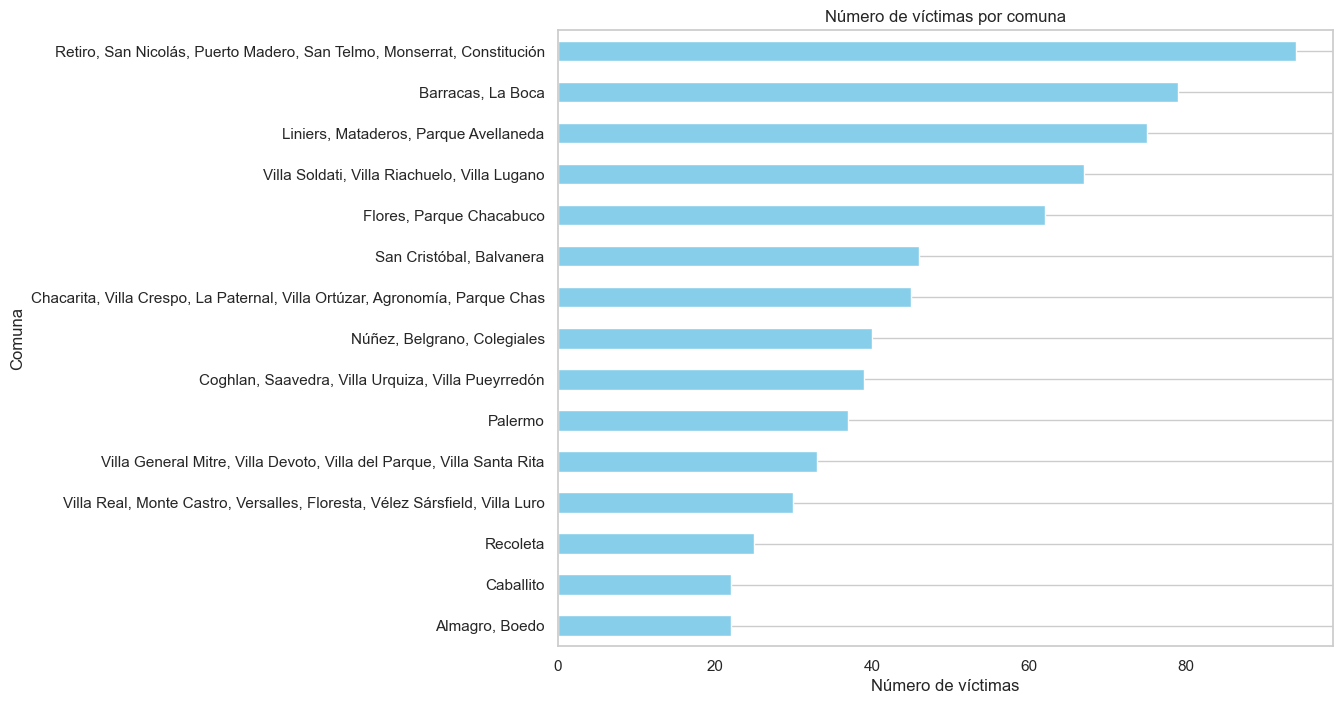

In [115]:
import matplotlib.pyplot as plt

# Agrupar por COMUNA_NOMBRE y sumar las víctimas
victimas_por_comuna = dataset_1.groupby('COMUNA_NOMBRE')['N_VICTIMAS'].sum()

# Graficar
plt.figure(figsize=(10, 8))
victimas_por_comuna.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Número de víctimas')
plt.ylabel('Comuna')
plt.title('Número de víctimas por comuna')
plt.grid(axis='x')
plt.show()


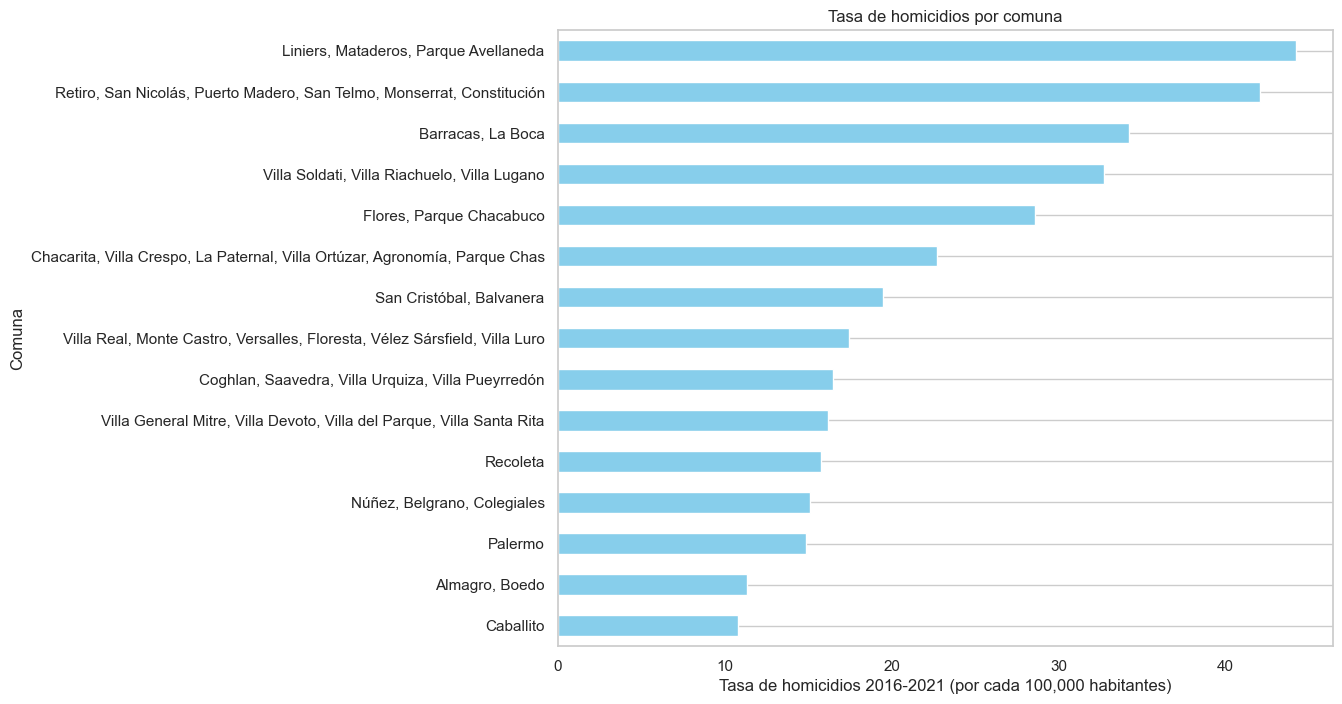

In [116]:
# Calcular la tasa de homicidios por comuna 2016-2021
tasa_homicidios_por_comuna = (dataset_1.groupby('COMUNA_NOMBRE')['N_VICTIMAS'].sum() / dataset_1.groupby('COMUNA_NOMBRE')['COMUNA_POB'].first()) * 100000

# Graficar la tasa de homicidios por comuna
plt.figure(figsize=(10, 8))
tasa_homicidios_por_comuna.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Tasa de homicidios 2016-2021 (por cada 100,000 habitantes)')
plt.ylabel('Comuna')
plt.title('Tasa de homicidios por comuna')
plt.grid(axis='x')
plt.show()


Se observa que la comuna con mayor cantidad de victimas es la correspondiente a [Retiro, San Nicolás, Puerto Madero, San Telmo, Monserrat, Constitución], sin embargo, al calcular la tasa de victimas de acuerdo a la población indicada por cada comuna, se obtiene que la mayor tasa se da en la comunna de [Liniers, Mataderos, Parque Avellaneda]. 

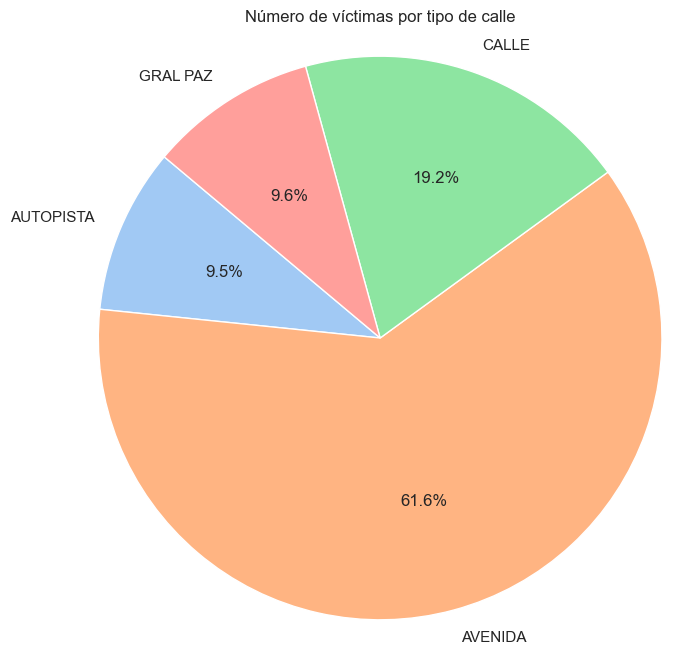

In [117]:
import matplotlib.pyplot as plt

# Agrupar por TIPO_DE_CALLE y sumar las víctimas
datos_por_tipo_calle = dataset_1.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(datos_por_tipo_calle, labels=datos_por_tipo_calle.index, autopct='%1.1f%%', startangle=140)
plt.title('Número de víctimas por tipo de calle')
plt.axis('equal')  # Para que la torta se vea como un círculo
plt.show()


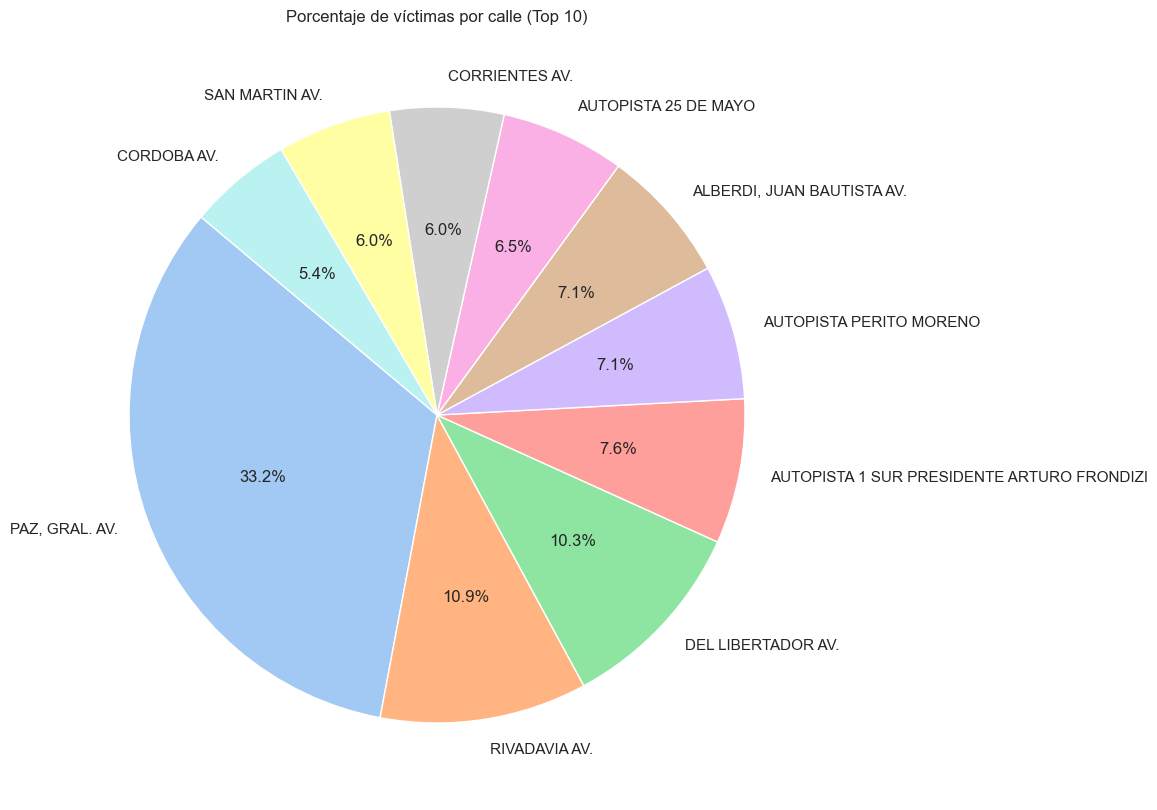

In [118]:
# Agrupar por CALLE y sumar las víctimas
victimas_por_calle = dataset_1.groupby('CALLE')['N_VICTIMAS'].sum()

# Graficar
plt.figure(figsize=(10, 10))
victimas_por_calle.sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de víctimas por calle (Top 10)')
plt.ylabel('')
plt.show()


In [119]:
# Filtrar los datos para eliminar filas con valores NaN en las columnas POSX y POSY
dataset_filtrado = dataset_1.dropna(subset=['POSX', 'POSY'])

# Crear un mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Añadir marcadores para cada accidente
for lat, lon in zip(dataset_filtrado['POSY'], dataset_filtrado['POSX']):
    folium.Marker([lat, lon]).add_to(mapa)

# Mostrar el mapa
mapa


In [120]:
# Cargar el archivo de límites de los barrios
barrios = gpd.read_file('_src/shp/barrios_wgs84.shp')

# Convertir las coordenadas de los eventos a objetos Point
geometry = [Point(xy) for xy in zip(dataset_filtrado['POSX'], dataset_filtrado['POSY'])]

# Crear un GeoDataFrame con los eventos y sus coordenadas
gdf = gpd.GeoDataFrame(dataset_filtrado, geometry=geometry)

# Realizar la asignación de barrios
def asignar_barrio(row):
    barrios_contenidos = barrios[barrios.contains(row.geometry)]
    if not barrios_contenidos.empty:
        return barrios_contenidos['BARRIO'].iloc[0]
    else:
        return "Desconocido"

gdf['Barrio'] = gdf.apply(asignar_barrio, axis=1)

# Mostrar el GeoDataFrame resultante
print(gdf[['POSX', 'POSY', 'Barrio']])


          POSX       POSY             Barrio
0   -58.475340 -34.687570    VILLA RIACHUELO
1   -58.508775 -34.669777        Desconocido
2   -58.390403 -34.631894       CONSTITUCION
3   -58.465039 -34.680930       VILLA LUGANO
4   -58.387183 -34.622466       CONSTITUCION
..         ...        ...                ...
691 -58.433538 -34.645616   PARQUE CHACABUCO
692 -58.467398 -34.651178  PARQUE AVELLANEDA
693 -58.472934 -34.619847   VILLA SANTA RITA
694 -58.470668 -34.650217  PARQUE AVELLANEDA
695 -58.379762 -34.586796             RETIRO

[695 rows x 3 columns]


In [121]:
# Crear un mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Añadir los límites de los barrios al mapa
for _, barrio in barrios.iterrows():
    folium.GeoJson(barrio['geometry']).add_to(mapa)

# Añadir círculos como marcadores para cada accidente
for _, evento in dataset_filtrado.iterrows():
    folium.CircleMarker(
        location=[evento['POSY'], evento['POSX']],
        radius=1,  # Tamaño del círculo
        color='red',  # Color del borde del círculo
        fill=True,
        fill_color='red',  # Color de relleno del círculo
        fill_opacity=0.9,
    ).add_to(mapa)

# Mostrar el mapa
mapa


## OBSERVACIONES LOCACIÓN

El mayor número de eventos se agrupan en calles tipo AVENIDA y GRAL. PAZ (Que también es una avenida), representando entre ambas el 71,2 % del total. 

En el análisis de las calles en particular con mayor cantidad de accidentes, GRAL. PAZ es la de mayor frecuencia con más del 30% de los casos, seguida por Av. Rivadavia y Av. Del Libertador. 

## Análisis de victimas en relación a sus carácteristicas
___

A continuación se estudia el tipo de vicitma, género, edad y relaciones con otras variables.

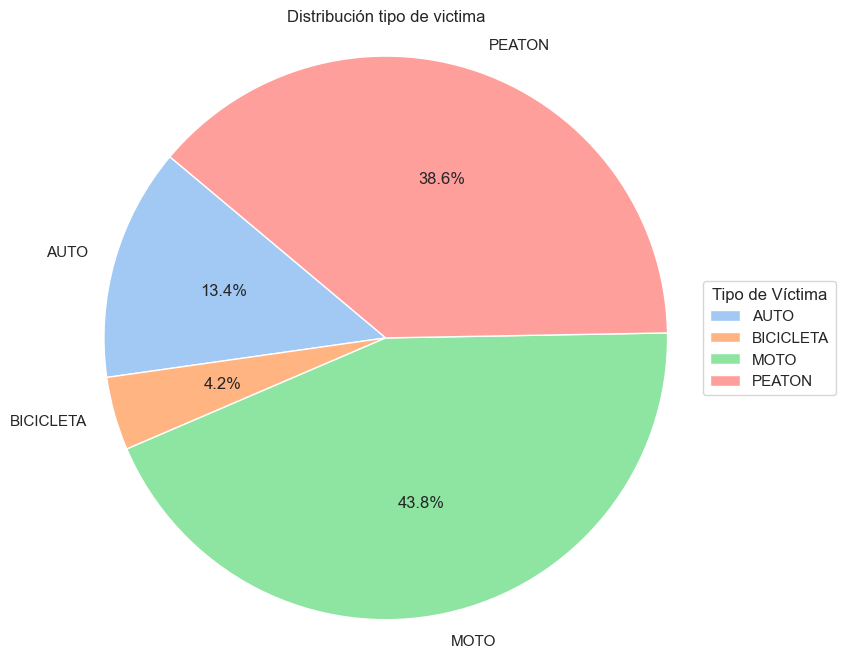

In [122]:
# Agrupar por VICTIMA y sumar las N_VICTIMAS
datos_agrupados_victimas = dataset_1.groupby('VICTIMA')['N_VICTIMAS'].sum()

# Filtrar los tipos de VICTIMA que superen el 1% del total
datos_filtrados = datos_agrupados_victimas[datos_agrupados_victimas / datos_agrupados_victimas.sum() > 0.01]

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(datos_filtrados, labels=datos_filtrados.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución tipo de victima')
plt.axis('equal')  # Para que el gráfico sea un círculo

# Crear el cuadro con la indicación del tipo de VICTIMA y el resultado
plt.legend(datos_filtrados.index, title="Tipo de Víctima", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()



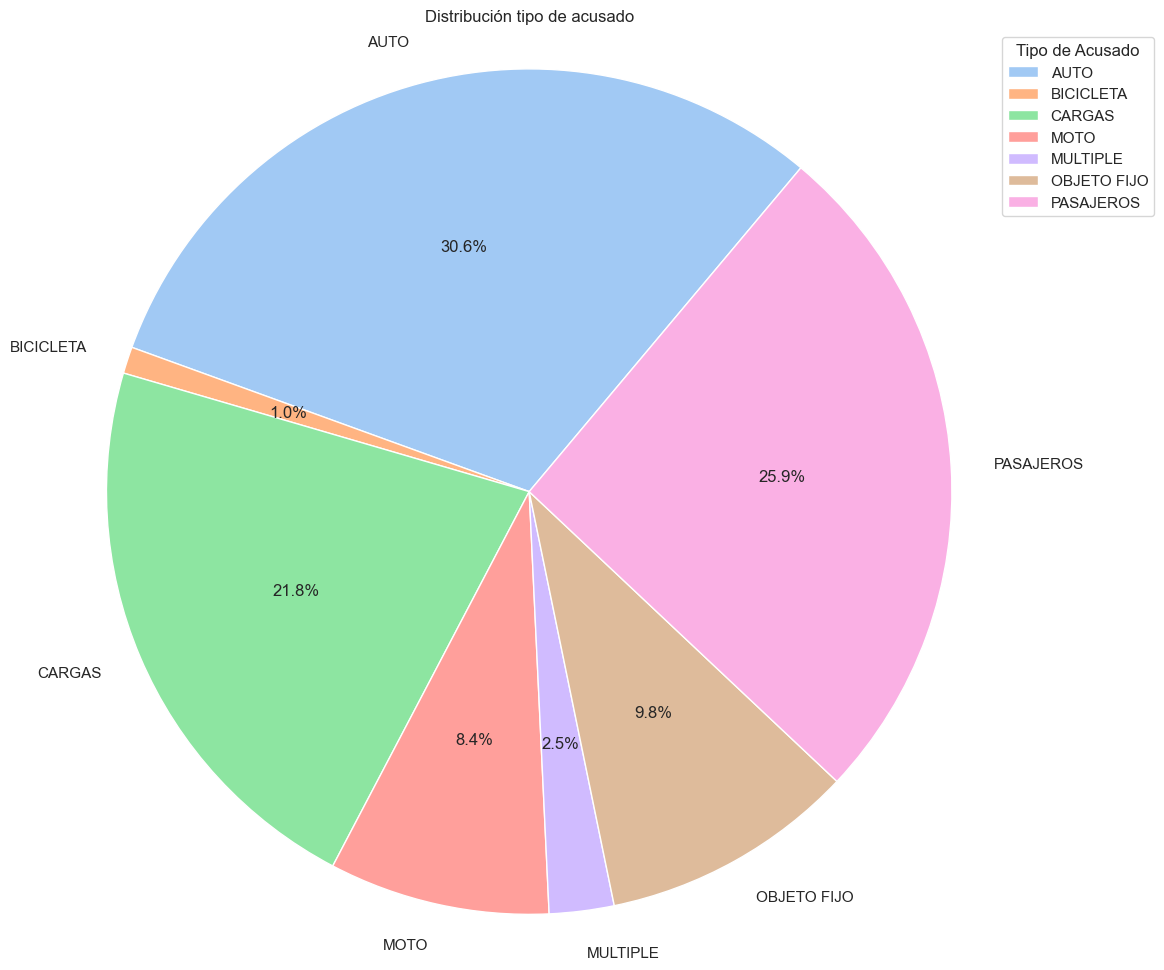

In [140]:
# Agrupar por ACUSADO y sumar las N_VICTIMAS
datos_agrupados_acusado = dataset_1.groupby('ACUSADO')['N_VICTIMAS'].sum()

# Filtrar los tipos de ACUSADO que superen el 1% del total
datos_filtrados_acusado = datos_agrupados_acusado[datos_agrupados_acusado / datos_agrupados_acusado.sum() > 0.01]

# Crear el gráfico de torta
plt.figure(figsize=(12, 12))
plt.pie(datos_filtrados_acusado, labels=datos_filtrados_acusado.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribución tipo de acusado')
plt.axis('equal')  # Para que el gráfico sea un círculo

# Crear el cuadro con la indicación del tipo de ACUSADO y el resultado
plt.legend(datos_filtrados_acusado.index, title="Tipo de Acusado", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

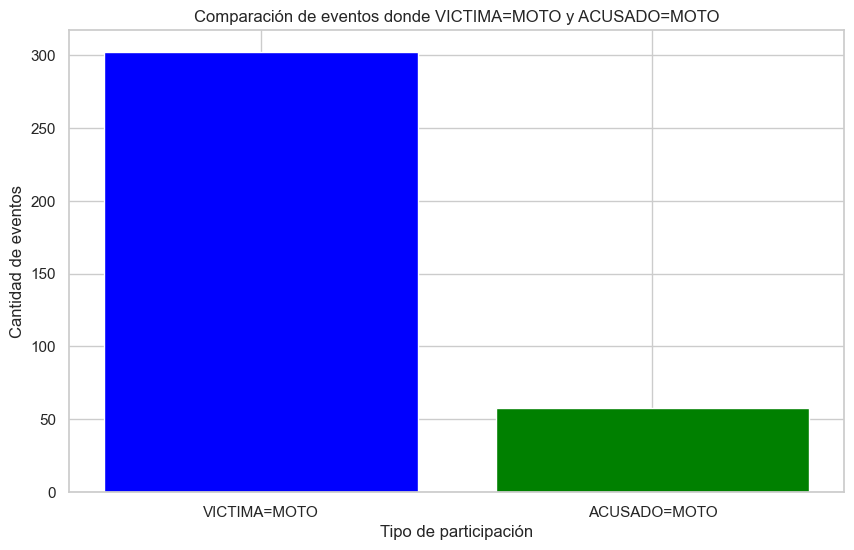

In [141]:
# Filtrar el DataFrame para obtener solo las filas donde VICTIMA=MOTO
victimas_moto = dataset[dataset['VICTIMA'] == 'MOTO']

# Contar la cantidad de eventos donde ACUSADO=MOTO
acusados_moto = dataset[dataset['ACUSADO'] == 'MOTO']

# Obtener la cantidad de eventos para VICTIMA=MOTO
cantidad_victimas_moto = len(victimas_moto)

# Obtener la cantidad de eventos para ACUSADO=MOTO
cantidad_acusados_moto = len(acusados_moto)

# Crear el gráfico de barras comparativo
plt.figure(figsize=(10, 6))
plt.bar(['VICTIMA=MOTO', 'ACUSADO=MOTO'], [cantidad_victimas_moto, cantidad_acusados_moto], color=['blue', 'green'])
plt.title('Comparación de eventos donde VICTIMA=MOTO y ACUSADO=MOTO')
plt.xlabel('Tipo de participación')
plt.ylabel('Cantidad de eventos')
plt.show()

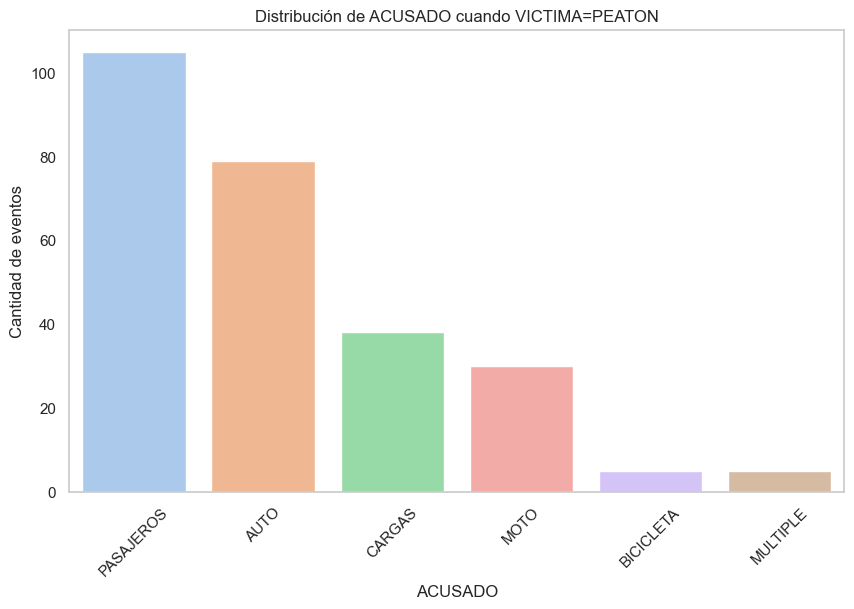

In [143]:
# Filtrar el DataFrame para obtener solo las filas donde VICTIMA=PEATON
peatones = dataset[dataset['VICTIMA'] == 'PEATON']

# Contar la cantidad de eventos para cada valor único de ACUSADO
distribucion_acusado_peaton = peatones['ACUSADO'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=distribucion_acusado_peaton.index, y=distribucion_acusado_peaton.values, hue=distribucion_acusado_peaton.index, dodge=False)
plt.title('Distribución de ACUSADO cuando VICTIMA=PEATON')
plt.xlabel('ACUSADO')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend([],[], frameon=False)
plt.show()

## Observación

Se observa que si bien las motocicletas el tipo de accidentado con mayor cantidad de fallecimientos con el 43.8% del total de casos, estos sólo están identificados como responsables de los accidentes en un 8.4%. 

Por otro lado, se observa que el segundo mayor grupo en cantidad de vicitmas son PEATONES. Para este grupo particular, el mayor número de responsabilidad está asignado a PASAJEROS, que se describen como: "Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia". 

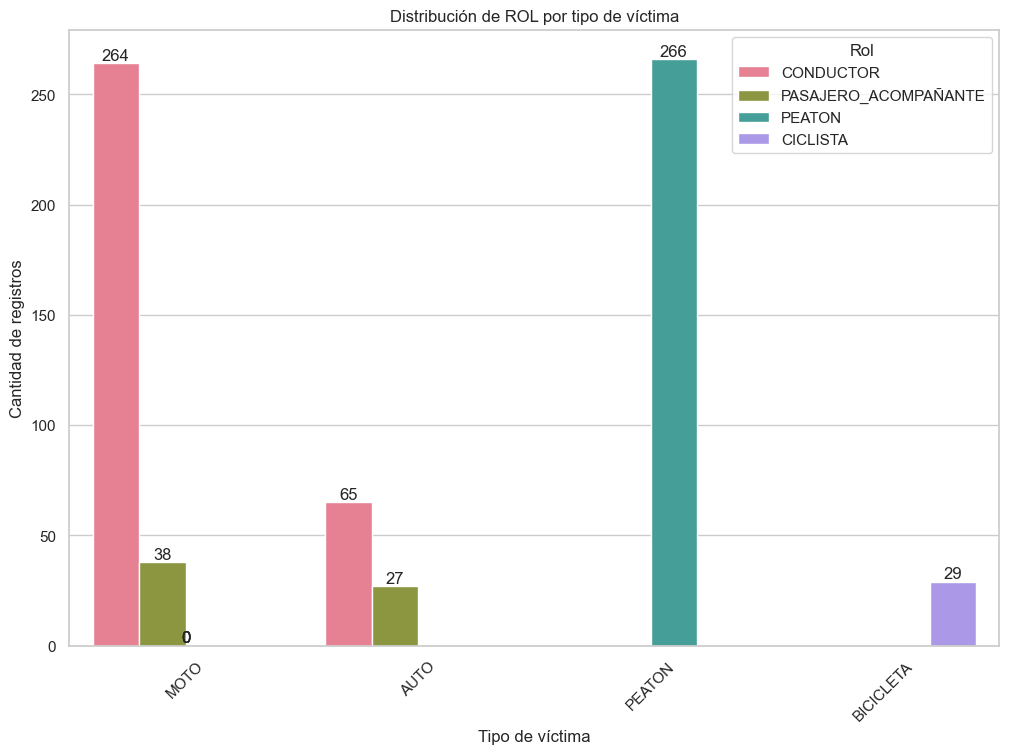

In [151]:
# Filtrar los datos para los tipos de víctimas más comunes
tipos_comunes = ['AUTO', 'BICICLETA', 'MOTO', 'PEATON']
datos_filtrados = dataset[dataset['VICTIMA'].isin(tipos_comunes)]

# Crear el gráfico de barras agrupado utilizando Seaborn
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=datos_filtrados, x='VICTIMA', hue='ROL', palette='husl')

# Agregar etiquetas de valores en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('Distribución de ROL por tipo de víctima')
plt.xlabel('Tipo de víctima')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.legend(title='Rol')
plt.show()


Se observa que para los accidentes de AUTOS, las victimas resultantes están divididas en dos tercios y un tercios del total de los casos para CONDUCTOR y el ACOMPAÑANTE respectivamente. 

Para el caso de las MOTOS, las victimas CONDUCTORES representan casi un 90% del total de fallecidos. Siendo poco más dle 10% de categoría ACOMPAÑANTE. 

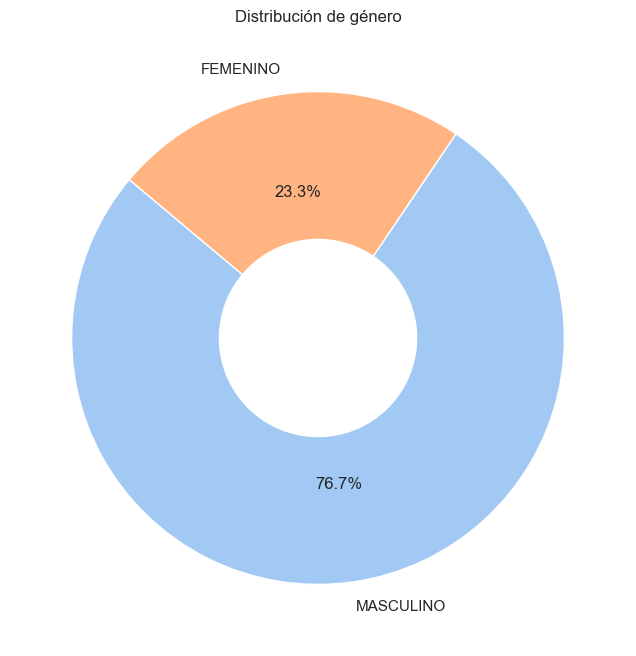

In [124]:
# Contar la cantidad de cada tipo de dato en la columna "SEXO"
conteo_sexo = dataset['SEXO'].value_counts()

# Crear el gráfico de torta tipo anillo 
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.6))
plt.title('Distribución de género')

# Mostrar el gráfico
plt.show()


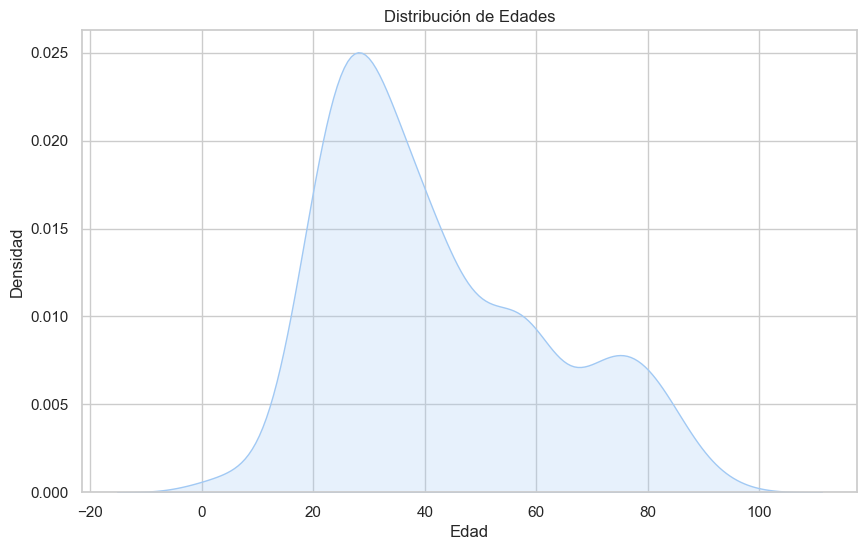

In [125]:
# Filtrar los datos para eliminar los valores nulos de la columna EDAD
datos_sin_nulos = dataset.dropna(subset=['EDAD'])

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=datos_sin_nulos['EDAD'], fill=True)

# Configurar el gráfico
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)

# Mostrar el gráfico
plt.show()



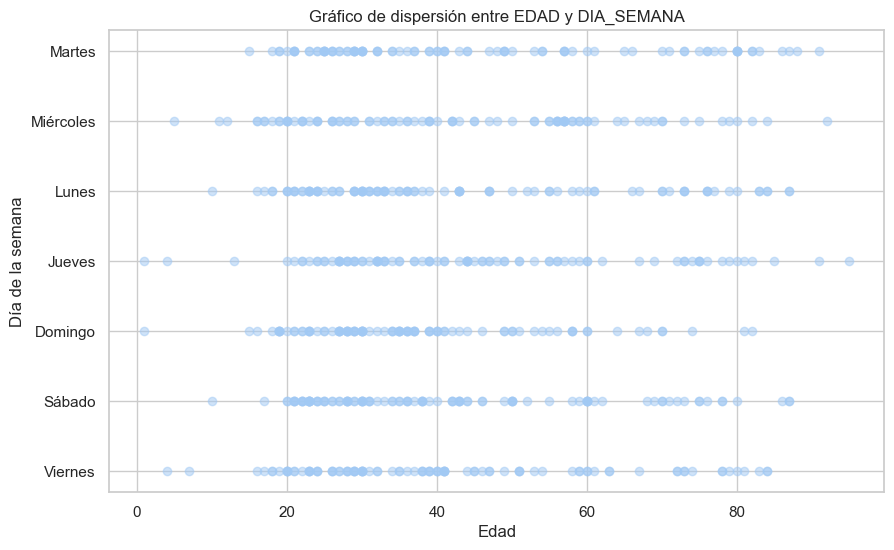

In [126]:
# Filtrar datos para eliminar valores nulos en EDAD y DIA_SEMANA_NUM
datos_sin_nulos = dataset.dropna(subset=['EDAD', 'DIA_SEMANA_STR'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos_sin_nulos['EDAD'], datos_sin_nulos['DIA_SEMANA_STR'], alpha=0.5)

# Configurar el título y etiquetas de los ejes
plt.title('Gráfico de dispersión entre EDAD y DIA_SEMANA')
plt.xlabel('Edad')
plt.ylabel('Día de la semana')

# Mostrar el gráfico
plt.grid(True)
plt.show()



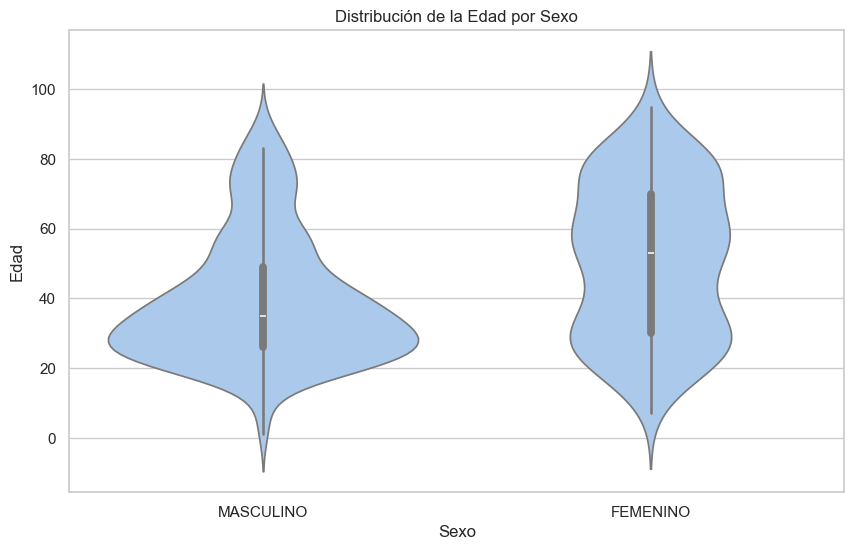

In [127]:
# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='SEXO', y='EDAD', data=dataset)
plt.title('Distribución de la Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()


## OBSERVACIONES EDAD Y GÉNERO

En la distribución de edades, se observa una concentración entre 20 y 40 años. Descartando algún indicio de causalidad respecto a la disminución de facultades por longevidad. 

Asímismo, cuando se analiza la distribución de edades en función del género, vemos que una disminución importante en la concentración de eventos por edad para el sexo FEMENINO. 

Que a su vez, el género FEMENINO representa el 23,3 % de las victimas totales. 



## Análisis de accidentes mortales de motociclistas
___

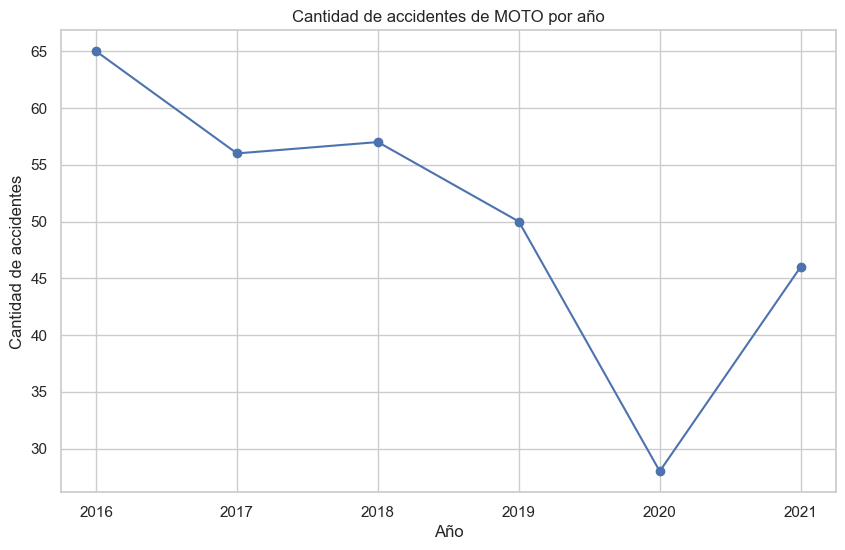

In [128]:
# Filtrar datos para obtener solo accidentes con VICTIMA igual a 'MOTO'
accidentes_moto = dataset[dataset['VICTIMA'] == 'MOTO']

# Agrupar por año y contar la cantidad de accidentes de moto
count_por_anio = accidentes_moto.groupby('AAAA').size()

# Crear el gráfico temporal
plt.figure(figsize=(10, 6))
count_por_anio.plot(marker='o', color='b')

# Configuración del gráfico
plt.title('Cantidad de accidentes de MOTO por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Mostrar el gráfico
plt.grid(True)
plt.show()


## KPI 2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

posx and posy should be finite values
posx and posy should be finite values


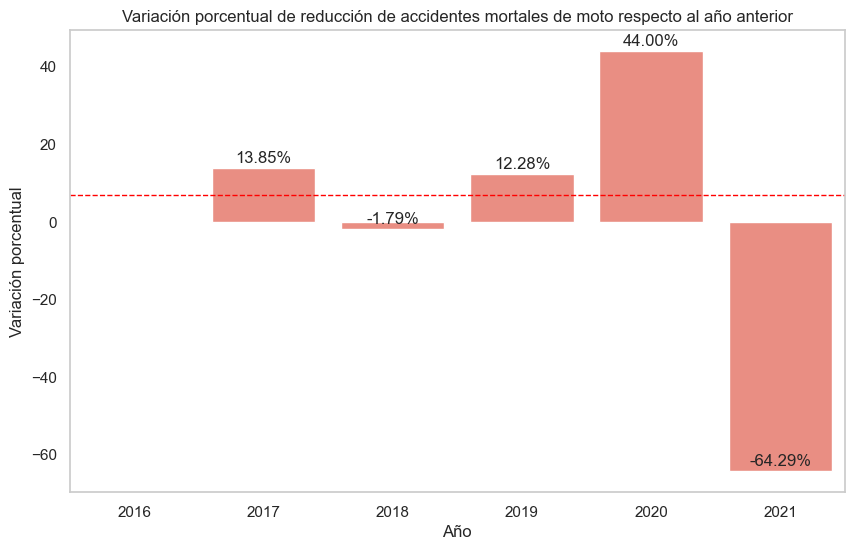

In [157]:
# Calcular la variación porcentual entre el año anterior y el año actual
variacion_porcentual = ((count_por_anio - count_por_anio.shift(1)) / count_por_anio.shift(1)) * -100

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=variacion_porcentual.index, y=variacion_porcentual, color='salmon')

# Agregar etiquetas de porcentaje sobre las barras
for index, value in enumerate(variacion_porcentual):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Configuración del gráfico
plt.title('Variación porcentual de reducción de accidentes mortales de moto respecto al año anterior')
plt.xlabel('Año')
plt.ylabel('Variación porcentual')
plt.grid(axis='y')

# Agregar la línea horizontal en y=10
plt.axhline(y=7, color='red', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.show()


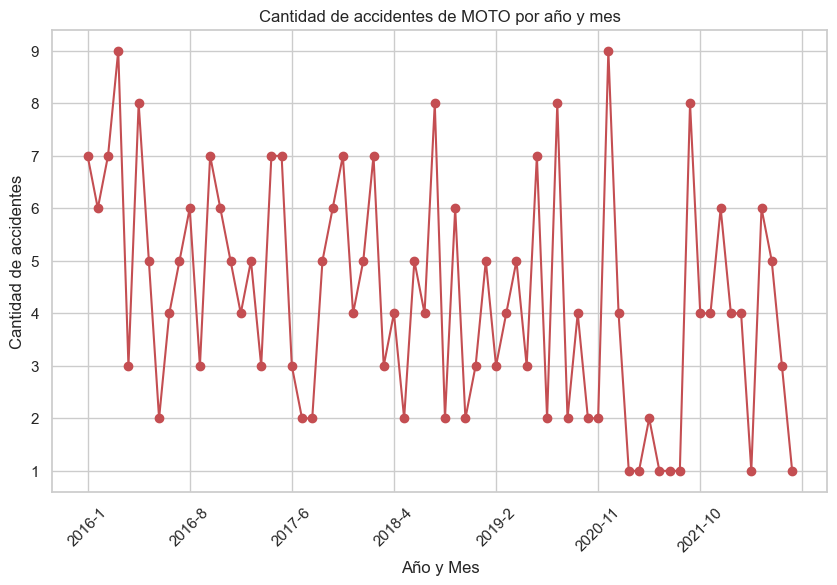

In [130]:
# Filtrar datos para obtener solo accidentes con VICTIMA igual a 'MOTO'
accidentes_moto = dataset[dataset['VICTIMA'] == 'MOTO'].copy()

# Crear una nueva columna combinando el año y el mes
accidentes_moto['AAAA_MM'] = accidentes_moto['AAAA'].astype(str) + '-' + accidentes_moto['MM'].astype(str)

# Agrupar por año y mes y contar la cantidad de accidentes de moto
count_por_anio_mes = accidentes_moto.groupby('AAAA_MM').size()

# Crear el gráfico temporal
plt.figure(figsize=(10, 6))
count_por_anio_mes.plot(marker='o', color='r')

# Configuración del gráfico
plt.title('Cantidad de accidentes de MOTO por año y mes')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad de accidentes')

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


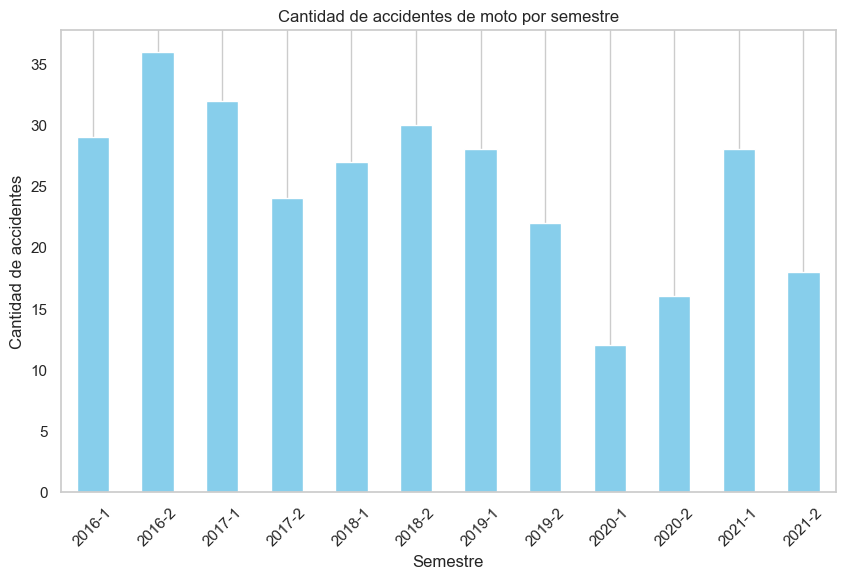

In [131]:
# Crear la columna de semestre
dataset['Semestre'] = dataset['AAAA'].astype(str) + '-' + ((dataset['MM'] - 1) // 6 + 1).astype(str)

# Filtrar los datos para las víctimas que son motos
accidentes_moto = dataset[dataset['VICTIMA'] == 'MOTO']

# Agrupar por semestre y contar la cantidad de accidentes
accidentes_por_semestre = accidentes_moto.groupby('Semestre').size()

# Crear el gráfico de barras para visualizar la evolución
plt.figure(figsize=(10, 6))
accidentes_por_semestre.plot(kind='bar', color='skyblue')
plt.title('Cantidad de accidentes de moto por semestre')
plt.xlabel('Semestre')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


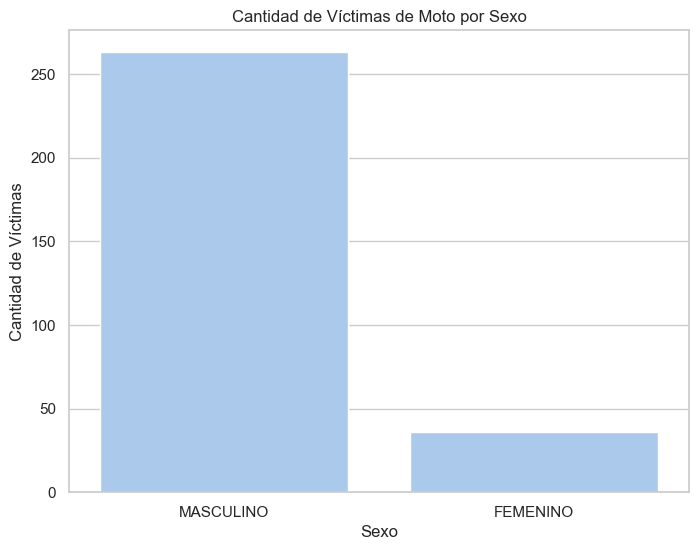

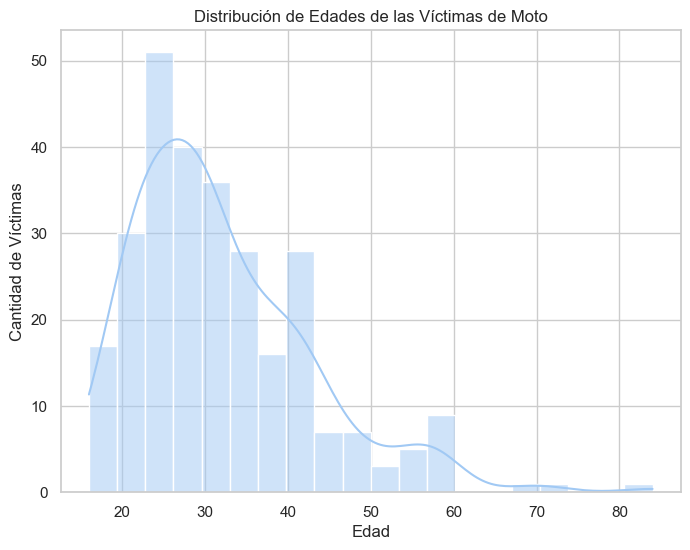

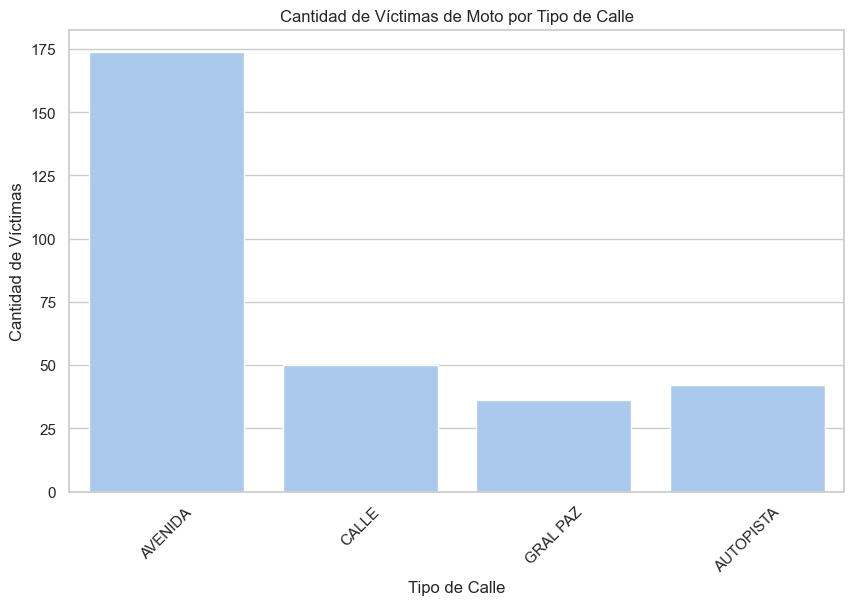

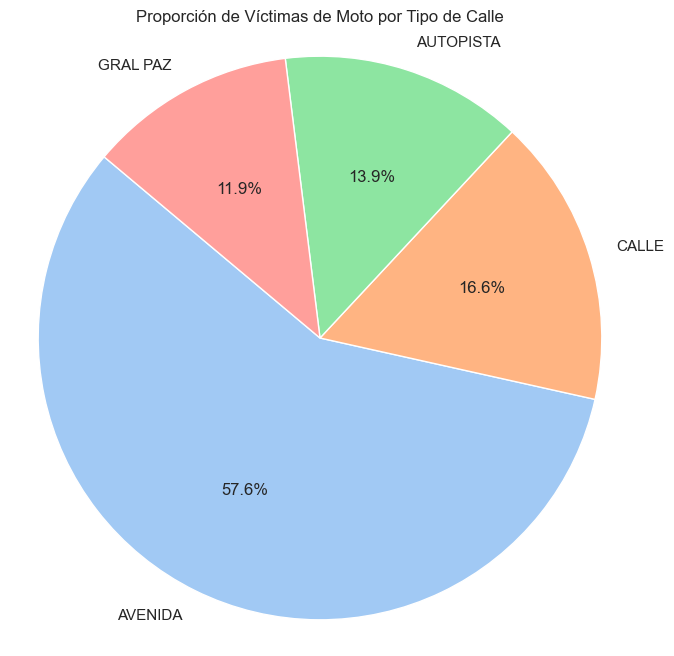

In [132]:
# Filtrar los datos para las víctimas de moto
victimas_moto = dataset[dataset['VICTIMA'] == 'MOTO']

# Gráfico de barras para la cantidad de víctimas de moto por sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=victimas_moto, x='SEXO')
plt.title('Cantidad de Víctimas de Moto por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Víctimas')
plt.show()

# Histograma de la distribución de edades de las víctimas de moto
plt.figure(figsize=(8, 6))
sns.histplot(data=victimas_moto, x='EDAD', bins=20, kde=True)
plt.title('Distribución de Edades de las Víctimas de Moto')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Víctimas')
plt.show()

# Gráfico de barras para la cantidad de víctimas de moto por tipo de calle
plt.figure(figsize=(10, 6))
sns.countplot(data=victimas_moto, x='TIPO_DE_CALLE')
plt.title('Cantidad de Víctimas de Moto por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)
plt.show()

# Calcular la cantidad de víctimas de moto por tipo de calle
victimas_por_tipo_calle = victimas_moto['TIPO_DE_CALLE'].value_counts()

# Graficar el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(victimas_por_tipo_calle, labels=victimas_por_tipo_calle.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Víctimas de Moto por Tipo de Calle')
plt.axis('equal')  # Hacer que el gráfico sea un círculo perfecto
plt.show()


Se observa que la distribución de victimas MOTOCILCISTAS en relación a las variables temporales, por GÉNERO y EDAD, siguen la misma tendencia que para el acumulado de vicitmas. 

Sin embargo, en el análsis de tipo de calle, se observa un posicionamiento más elevado de accidentes en CALLES, siendo este caso mayor al de Av. GRAL PAZ. 

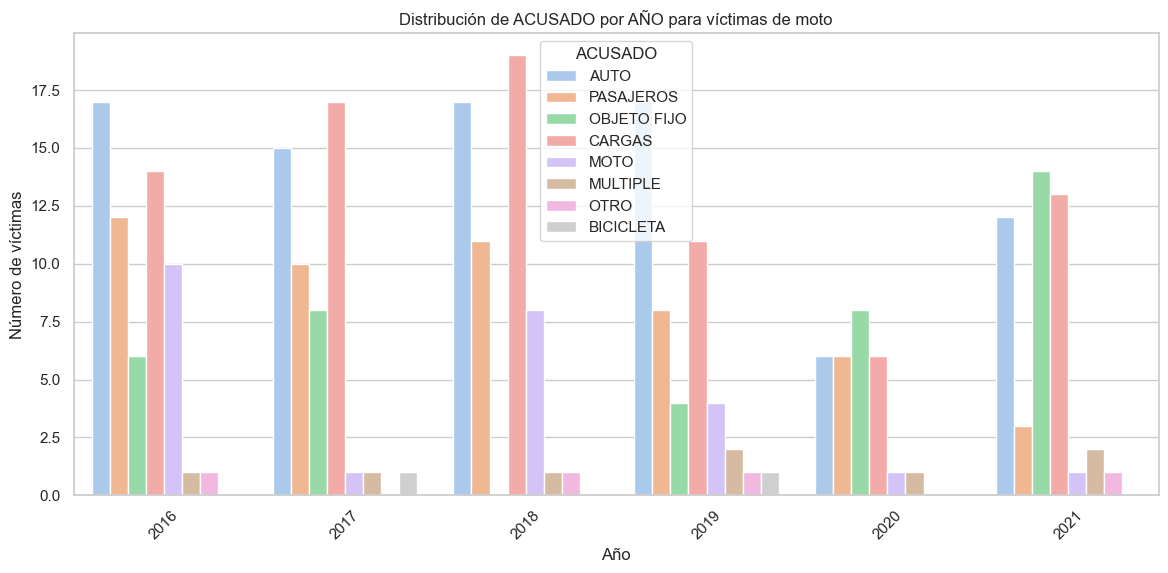

In [159]:
# Graficar la distribución de ACUSADO por AÑO
plt.figure(figsize=(14, 6))
sns.countplot(data=victimas_moto, x='AAAA', hue='ACUSADO')
plt.title('Distribución de ACUSADO por AÑO para víctimas de moto')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.legend(title='ACUSADO')
plt.xticks(rotation=45)
plt.show()


Se observa que si bien las MOTOS son el tipo de victimas que más registro acumula, al analizar los tipo de ACUSADO sobre estos casos, su valor disminuye considerablemente en la proporción del total. 

Se puede apreciar que AUTOS y vehículos de CARGA, representan la mayor cantidad de ACUSADOS en el transcurrir de los años. 

Un valor destacado es el caso de OBJETOS FIJOS, que para el año 2021 es el tipo que más acumula, definido de la siguiente forma: 
'Colisión contra objetos inmóviles fijados de manera permanente o semipermanente (columna, árbol, semáforo, etc.) o pérdidas de equilibrio de vehículos de dos ruedas que desencadenen la caída de sus ocupantes.'